In [15]:
#imports
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

In [16]:
#load data
df = pd.read_csv("../data/aggregated_data_with_changes.csv")

In [27]:
#methods to visualize the distribution of the variables
def plot_distribution(df, column): 
    plt.figure(figsize=(10, 6)) 
    sns.histplot(df[column], kde=True, bins=30) 
    plt.title(f'Distribution of {column}') 
    plt.xlabel(column) 
    plt.ylabel('Frequency') 
    plt.show()

def check_normal_distribution(df, column):
    mean = df[column].mean()
    std = df[column].std()
    
    z_scores = (df[column] - mean) / std
    
    within_3_std = np.sum((z_scores > -3) & (z_scores < 3)) / len(z_scores)
    
    is_normal = within_3_std > 0.99  # If 99% of data points fall within -3 and 3, consider it normally distributed
    
    # if is_normal:
    #     print(f"The column '{column}' is normally distributed.")
    # else:
    #     print(f"The column '{column}' is not normally distributed.")

    return is_normal

def evaluate_transformations(df, column):
    transformations = {
        'original': df[column],
        'log': np.log(df[column] + 1),
        'sqrt': np.sqrt(df[column]),
        'boxcox': stats.boxcox(df[column] + 1)[0],
        'yeojohnson': PowerTransformer(method='yeo-johnson').fit_transform(df[[column]])
    }
    
    results = {}
    
    for name, data in transformations.items():
        # Calculate Z-scores
        z_scores = (data - data.mean()) / data.std()
        # Perform Shapiro-Wilk test
        shapiro_test = stats.shapiro(data)
        
        results[name] = {
            'z_scores': z_scores,
            'shapiro_statistic': shapiro_test[0],
            'shapiro_p_value': shapiro_test[1]
        }
        
        # Plot distribution
        plt.figure(figsize=(10, 6))
        sns.histplot(z_scores, kde=True, bins=30)
        plt.title(f'Distribution of Z-scores for {name} transformation')
        plt.xlabel('Z-scores')
        plt.ylabel('Frequency')
        plt.show()
        
    return results


def print_normal_distribution_likelihood(results):
    for transformation, result in results.items():
        shapiro_statistic = result['shapiro_statistic']
        shapiro_p_value = result['shapiro_p_value']
        
        print(f"Transformation: {transformation}")
        print(f"Shapiro-Wilk Statistic: {shapiro_statistic:.4f}")
        print(f"Shapiro-Wilk p-value: {shapiro_p_value:.4f}")
        
        if shapiro_p_value > 0.05:
            print("Likelihood of normal distribution: High\n")
        elif shapiro_p_value > 0.01:
            print("Likelihood of normal distribution: Moderate\n")
        else:
            print("Likelihood of normal distribution: Low\n")

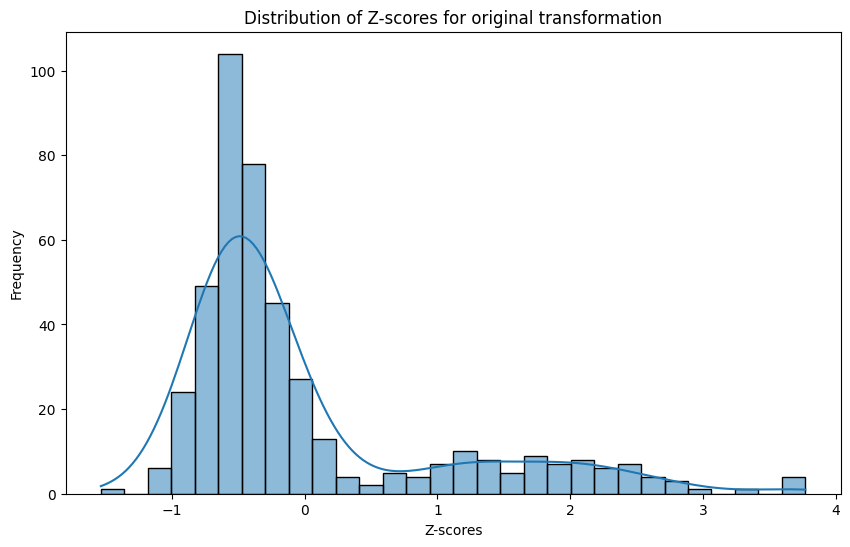

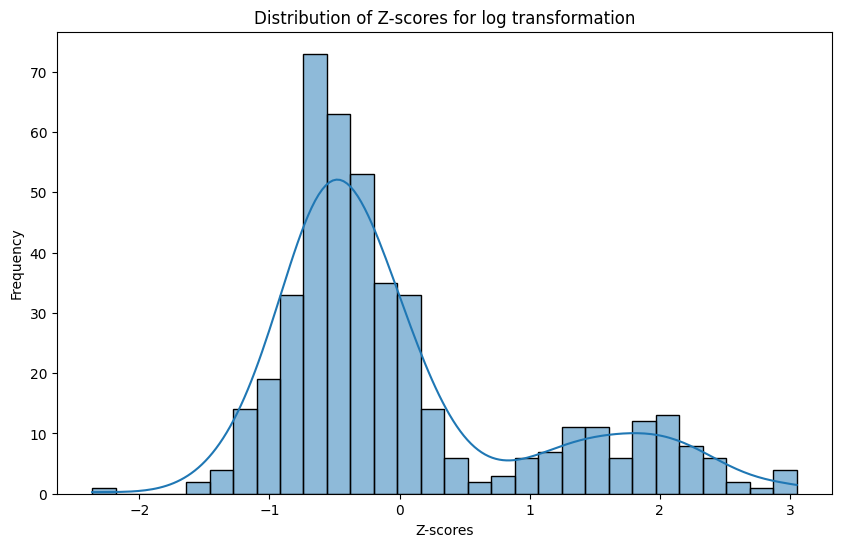

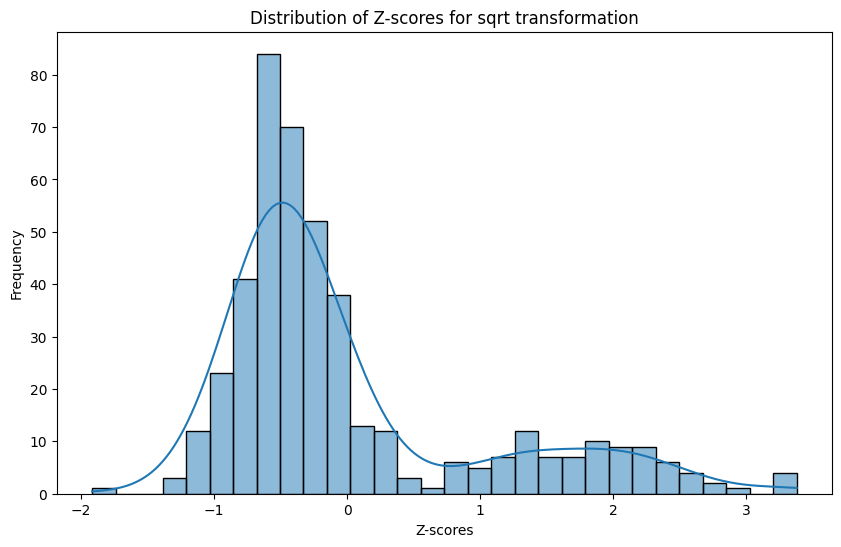

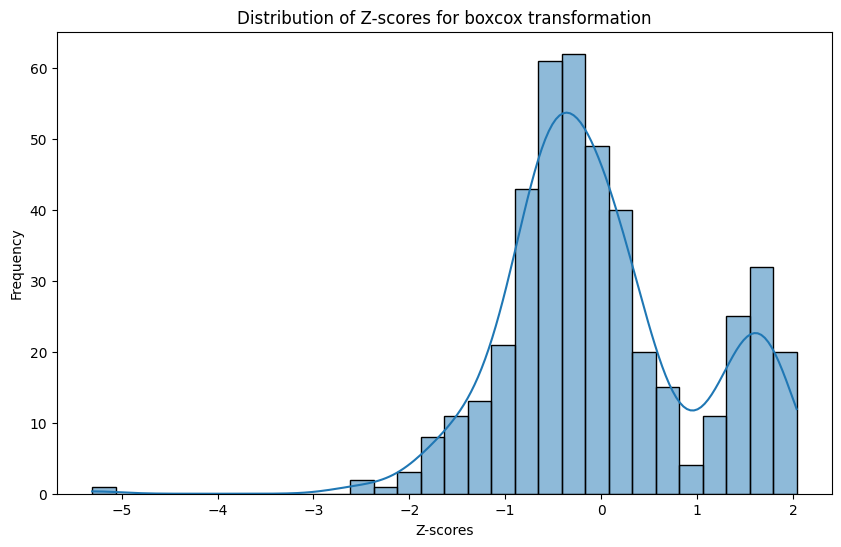

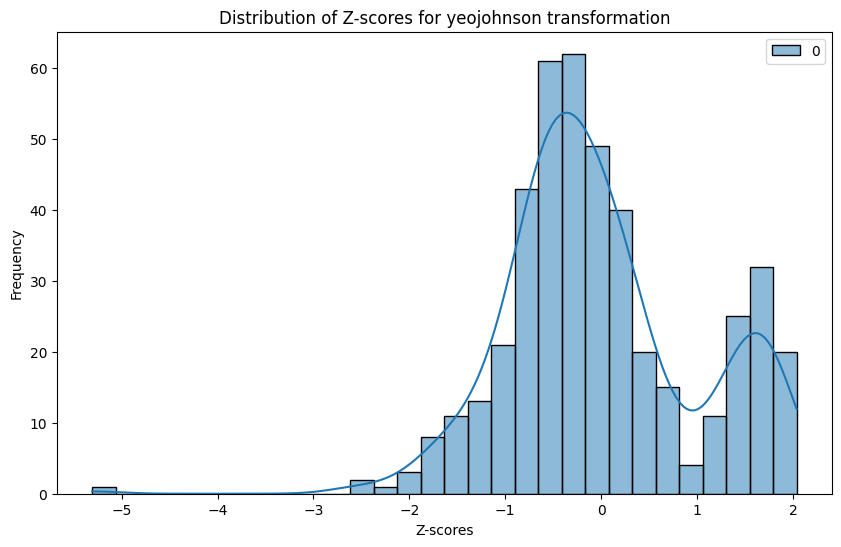

Transformation: original
Shapiro-Wilk Statistic: 0.7669
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: log
Shapiro-Wilk Statistic: 0.8511
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.8118
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: boxcox
Shapiro-Wilk Statistic: 0.9455
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.9455
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low



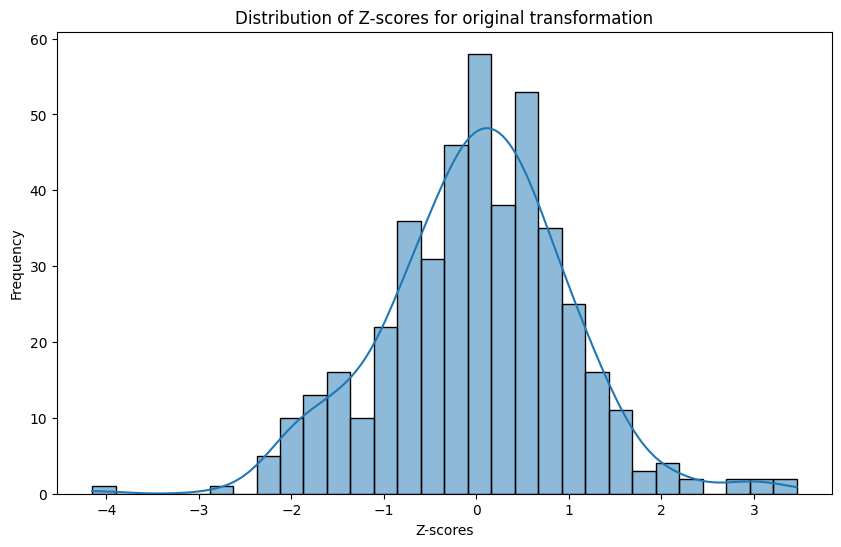

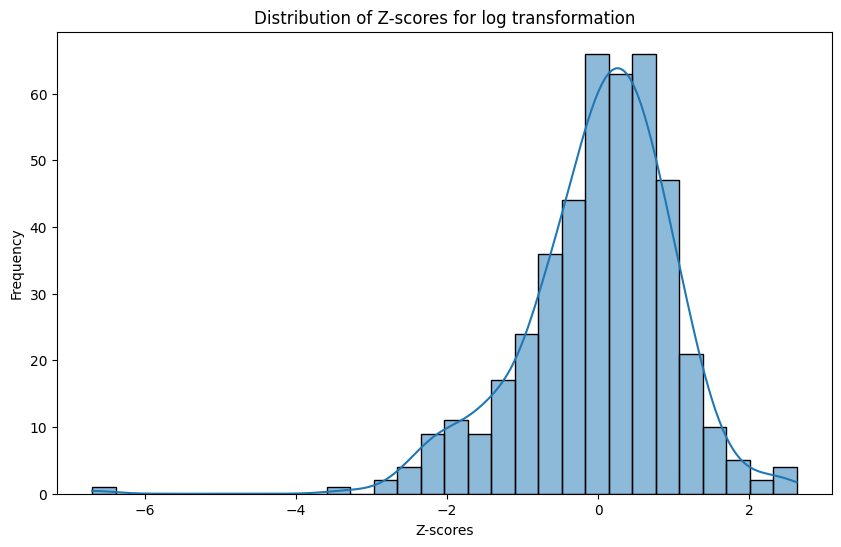

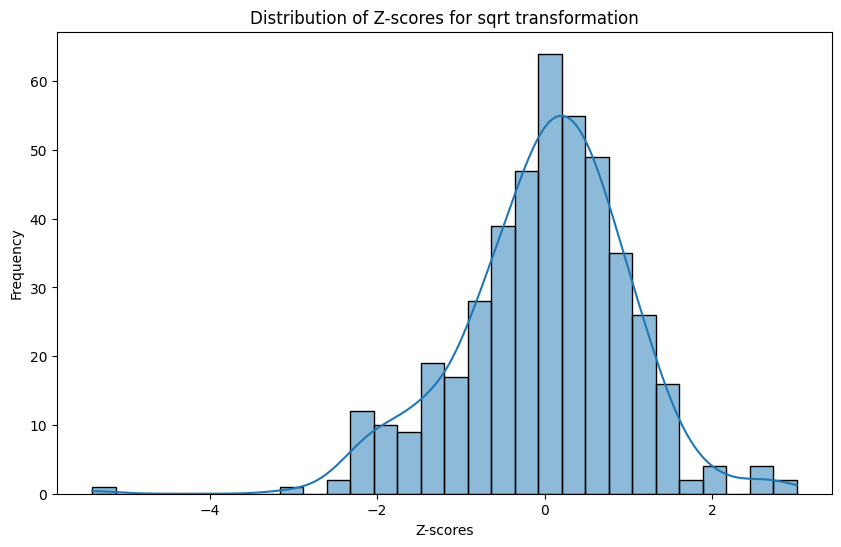

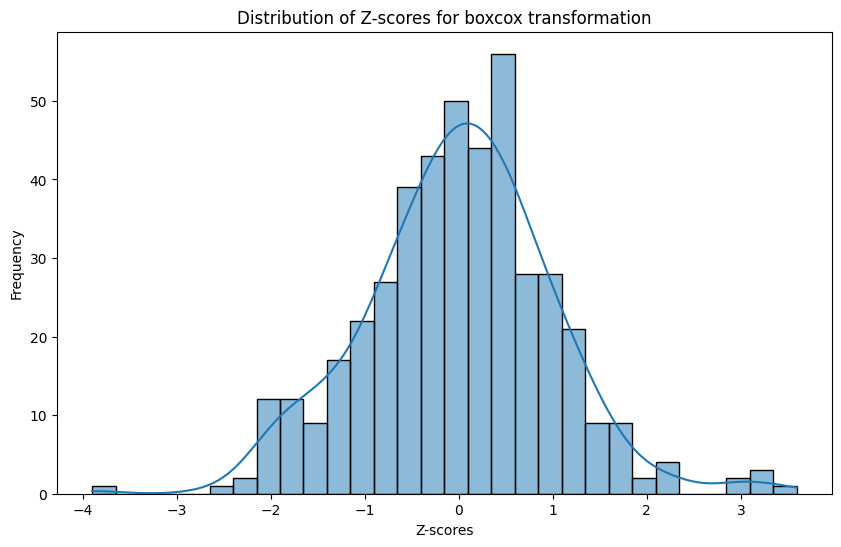

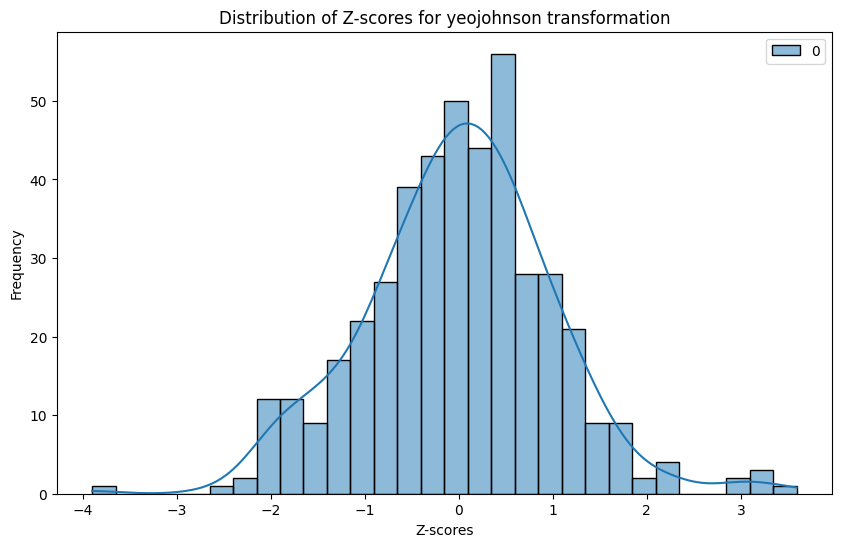

Transformation: original
Shapiro-Wilk Statistic: 0.9887
Shapiro-Wilk p-value: 0.0018
Likelihood of normal distribution: Low

Transformation: log
Shapiro-Wilk Statistic: 0.9470
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.9754
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: boxcox
Shapiro-Wilk Statistic: 0.9891
Shapiro-Wilk p-value: 0.0022
Likelihood of normal distribution: Low

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.9891
Shapiro-Wilk p-value: 0.0022
Likelihood of normal distribution: Low



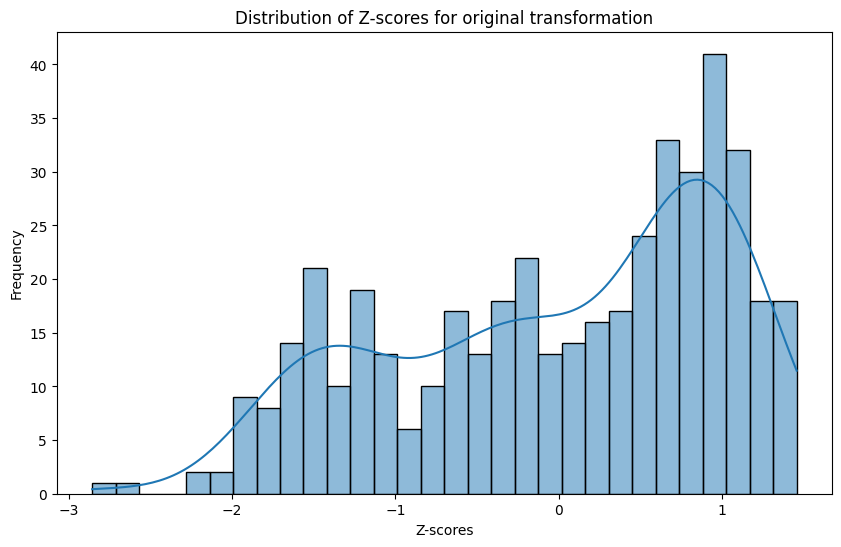

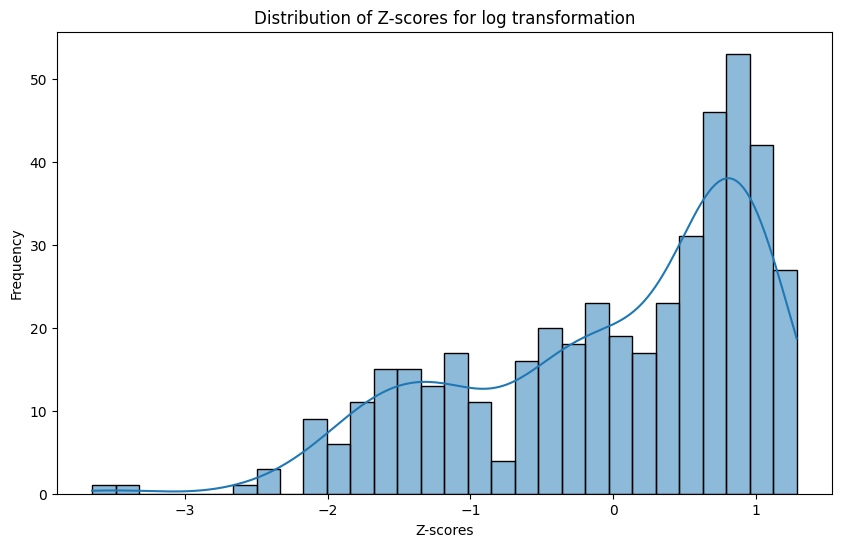

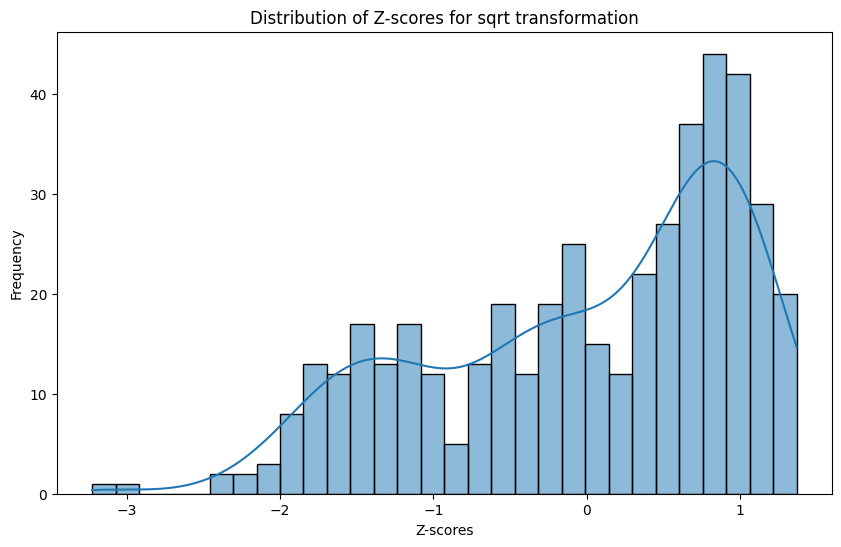

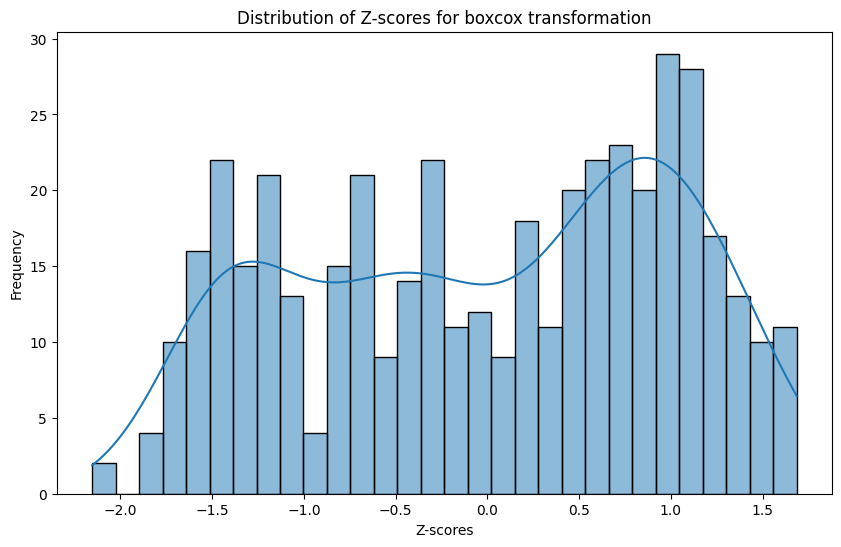

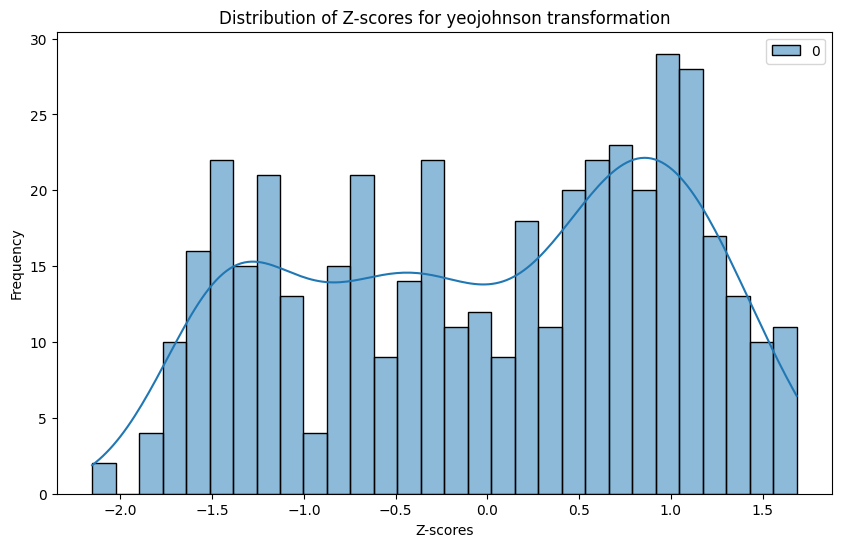

Transformation: original
Shapiro-Wilk Statistic: 0.9316
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: log
Shapiro-Wilk Statistic: 0.9091
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.9219
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: boxcox
Shapiro-Wilk Statistic: 0.9442
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.9442
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low



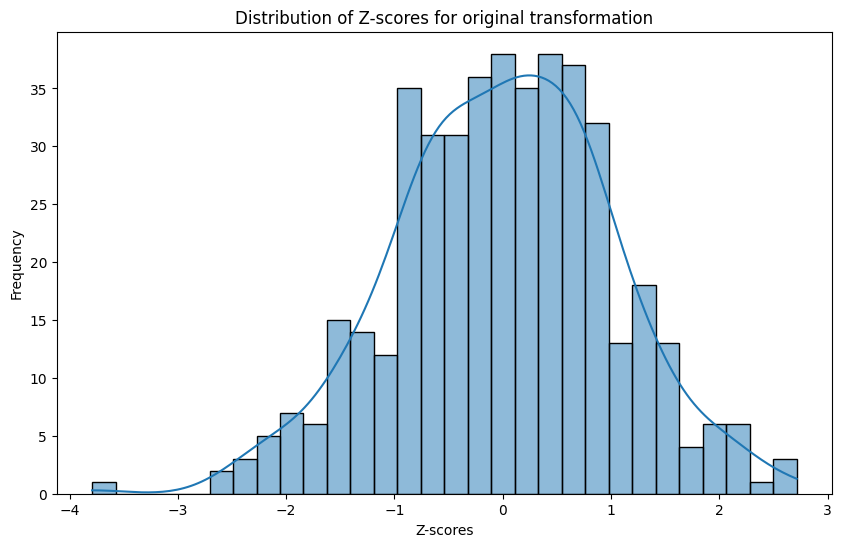

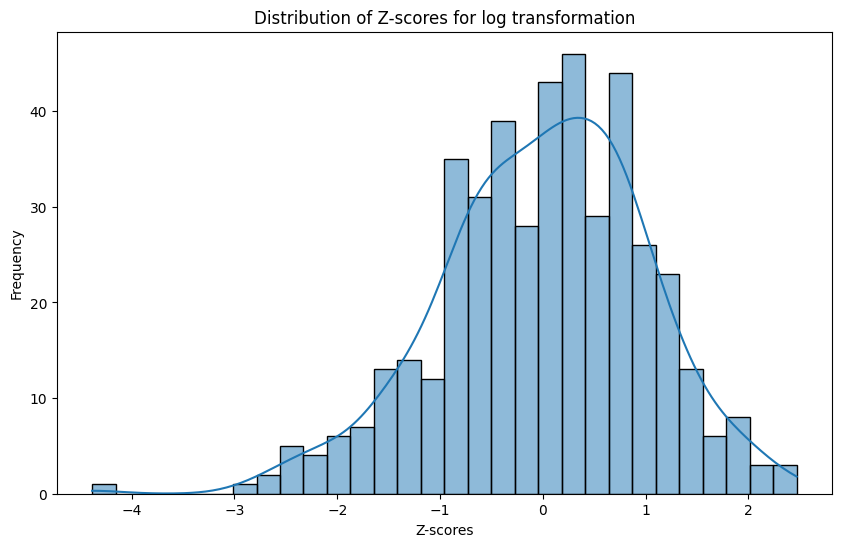

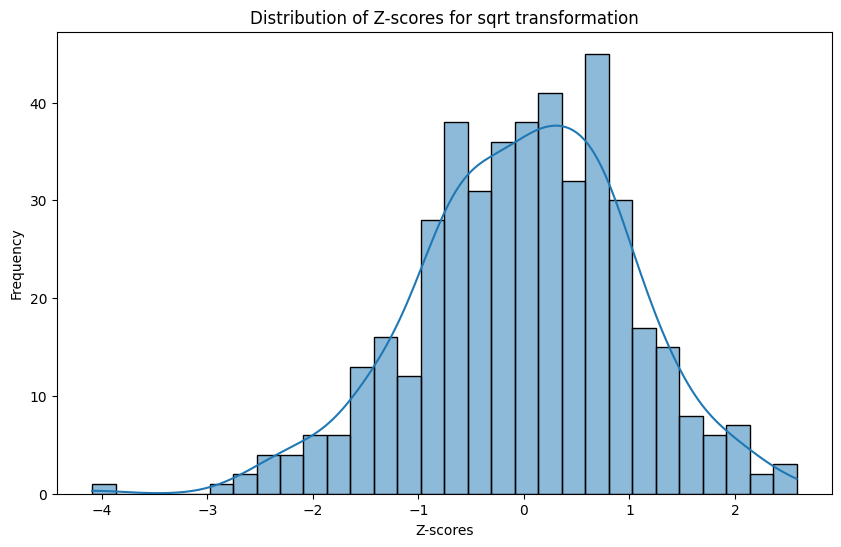

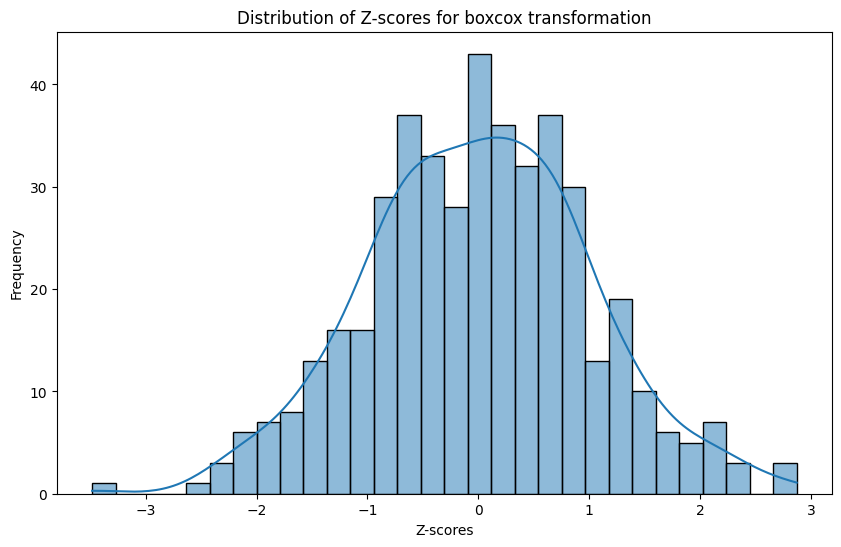

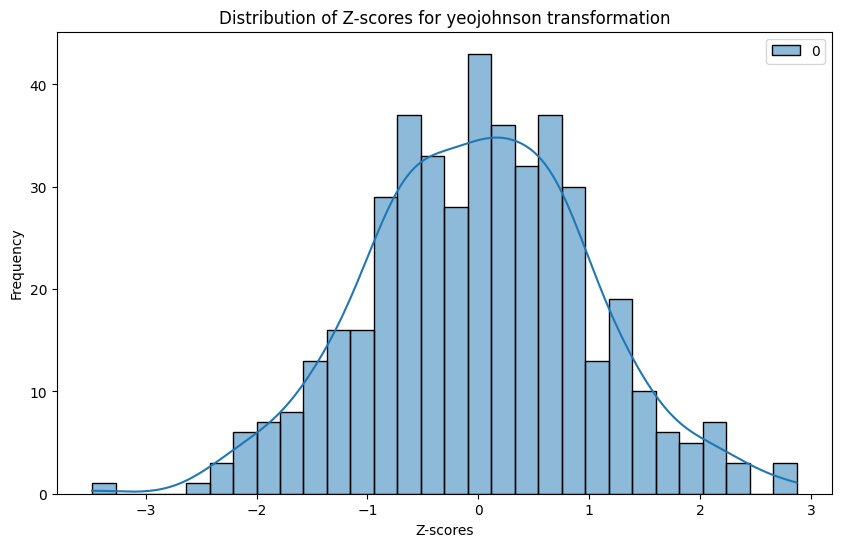

Transformation: original
Shapiro-Wilk Statistic: 0.9967
Shapiro-Wilk p-value: 0.5124
Likelihood of normal distribution: High

Transformation: log
Shapiro-Wilk Statistic: 0.9891
Shapiro-Wilk p-value: 0.0023
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.9936
Shapiro-Wilk p-value: 0.0607
Likelihood of normal distribution: High

Transformation: boxcox
Shapiro-Wilk Statistic: 0.9979
Shapiro-Wilk p-value: 0.8628
Likelihood of normal distribution: High

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.9979
Shapiro-Wilk p-value: 0.8628
Likelihood of normal distribution: High



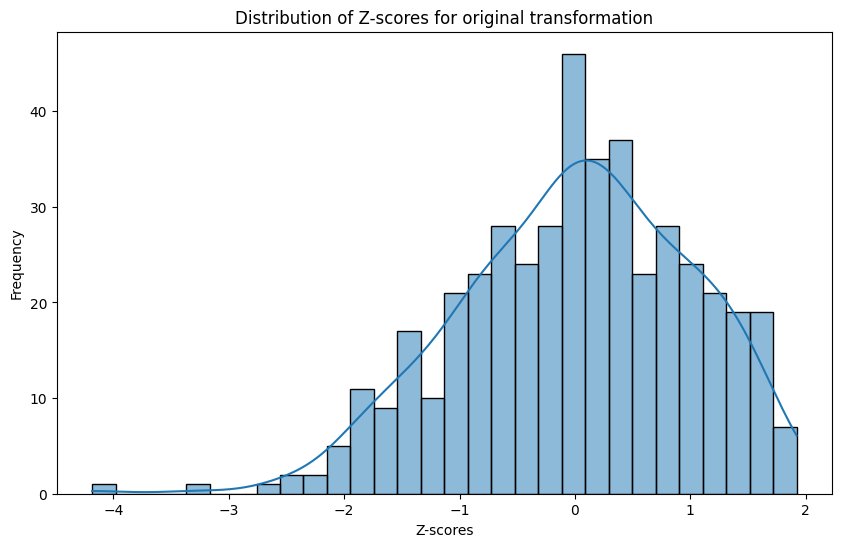

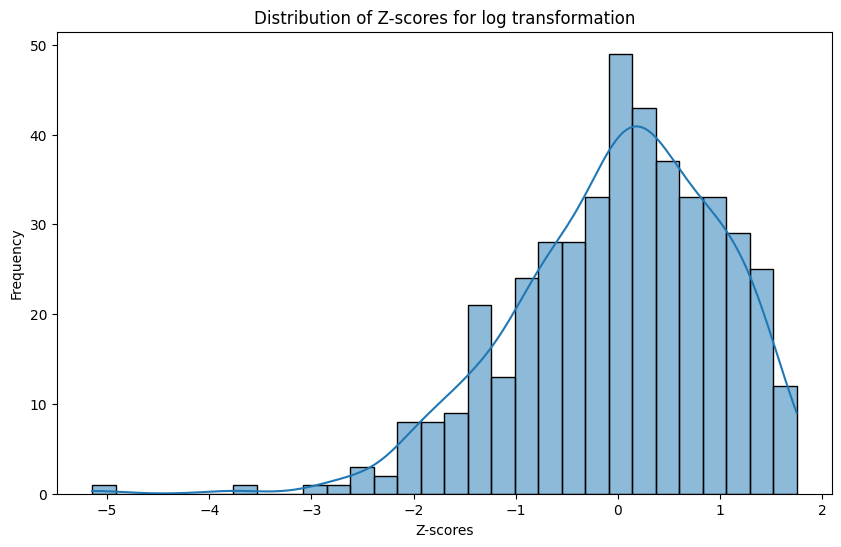

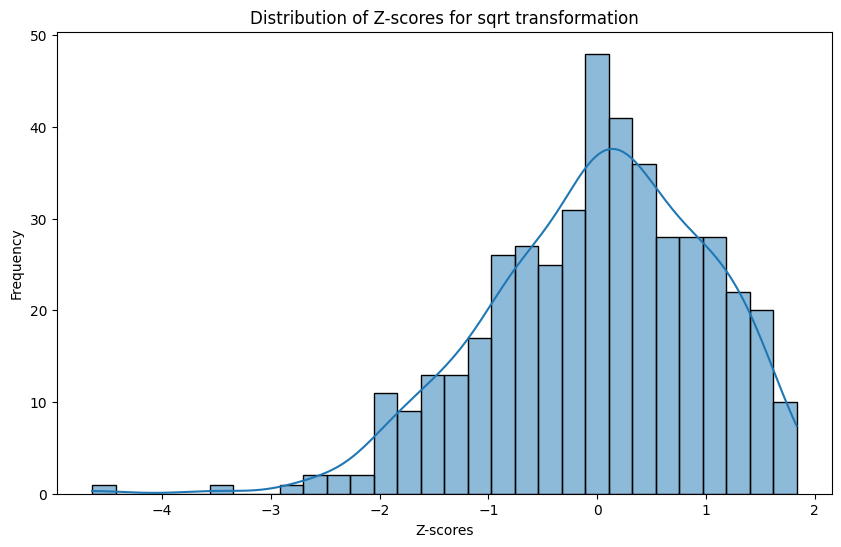

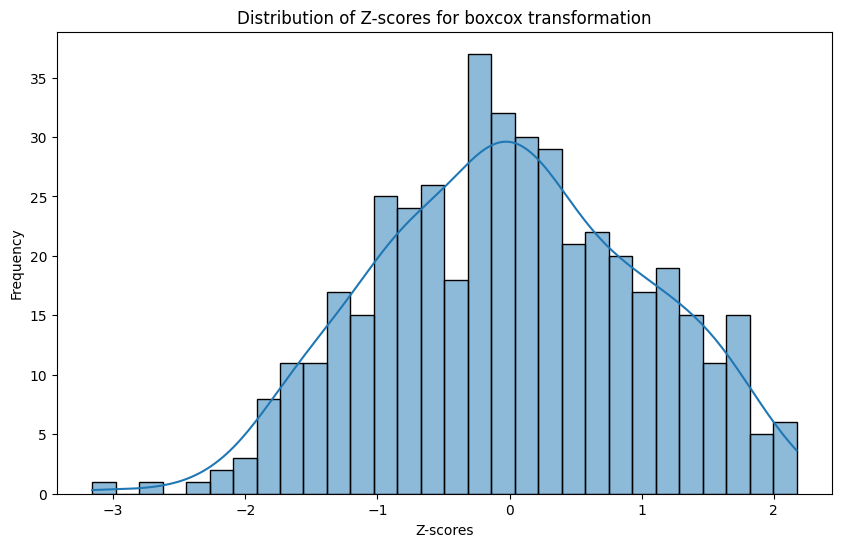

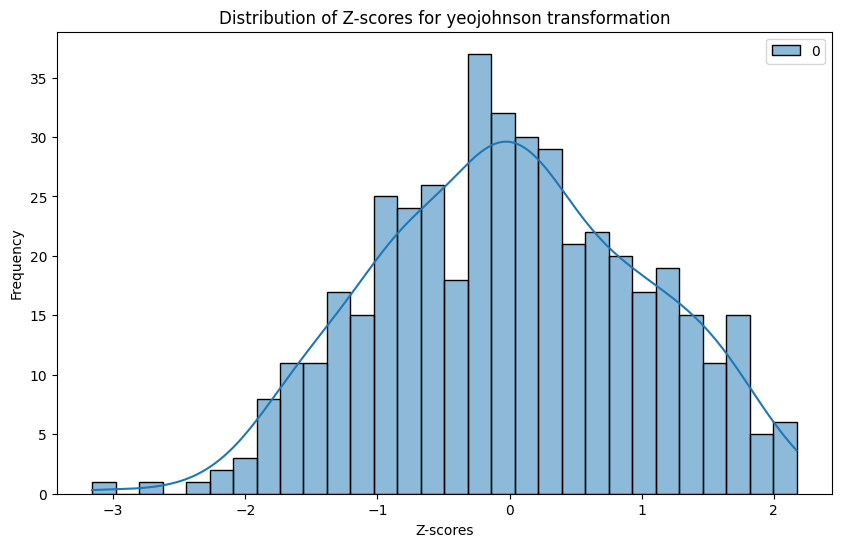

Transformation: original
Shapiro-Wilk Statistic: 0.9837
Shapiro-Wilk p-value: 0.0001
Likelihood of normal distribution: Low

Transformation: log
Shapiro-Wilk Statistic: 0.9646
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.9756
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: boxcox
Shapiro-Wilk Statistic: 0.9921
Shapiro-Wilk p-value: 0.0191
Likelihood of normal distribution: Moderate

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.9921
Shapiro-Wilk p-value: 0.0191
Likelihood of normal distribution: Moderate



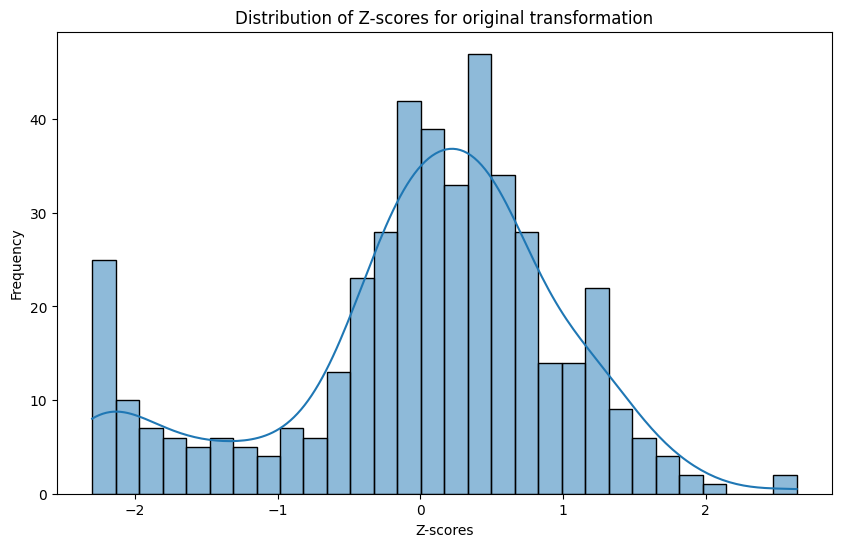

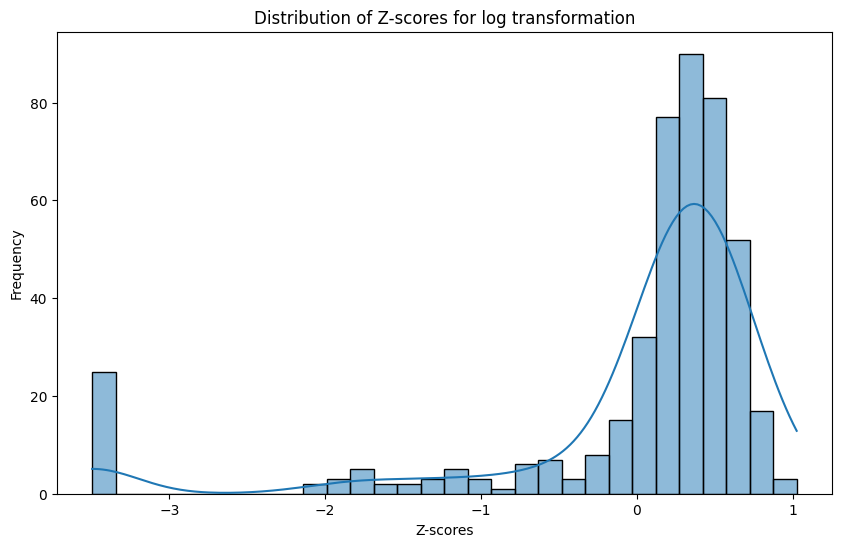

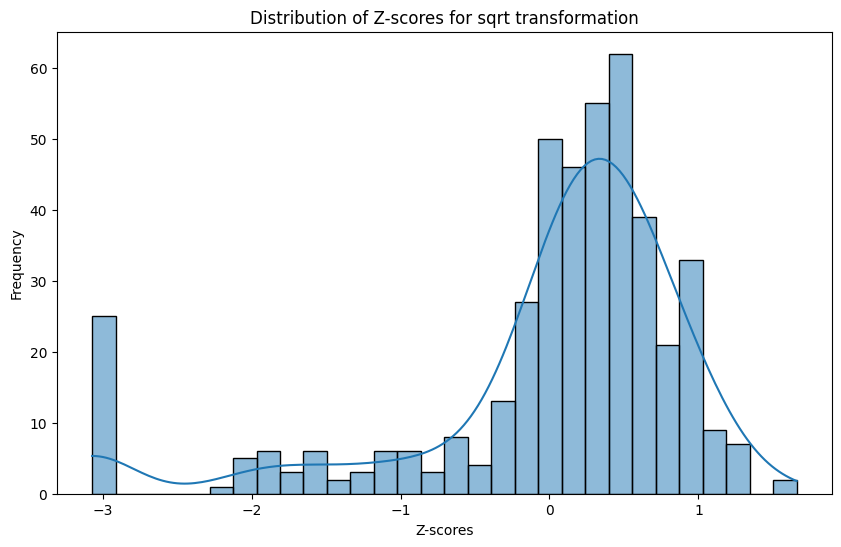

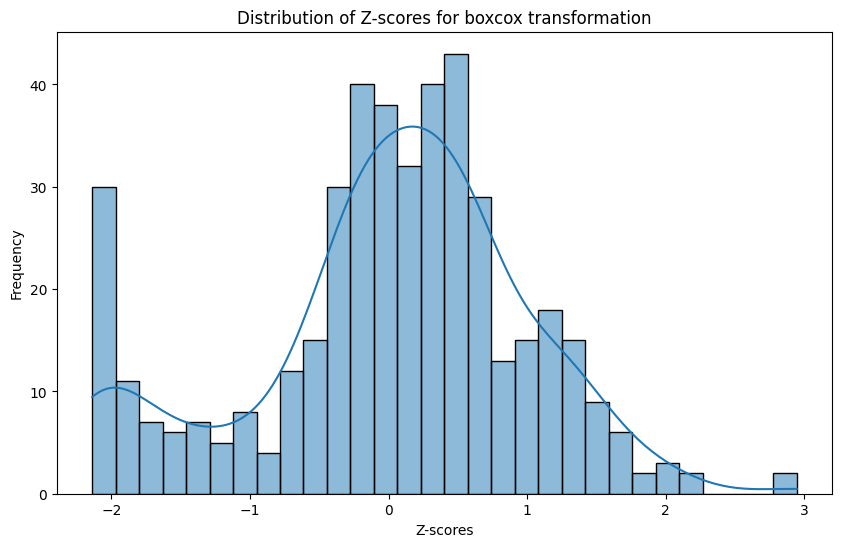

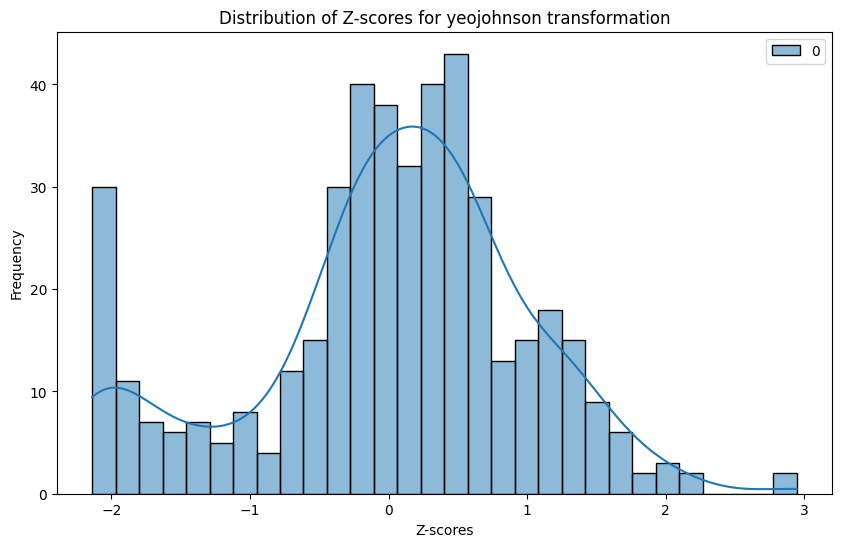

Transformation: original
Shapiro-Wilk Statistic: 0.9361
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: log
Shapiro-Wilk Statistic: 0.6188
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.7857
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: boxcox
Shapiro-Wilk Statistic: 0.9568
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.9568
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low



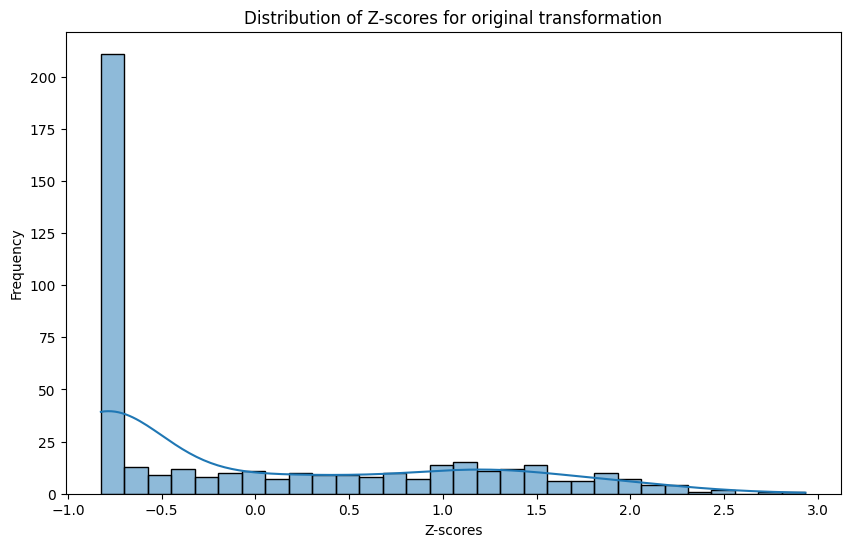

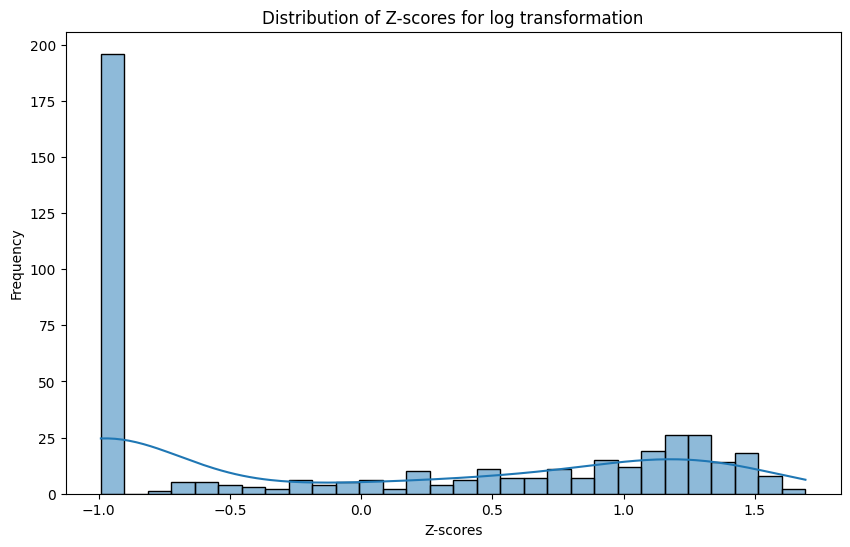

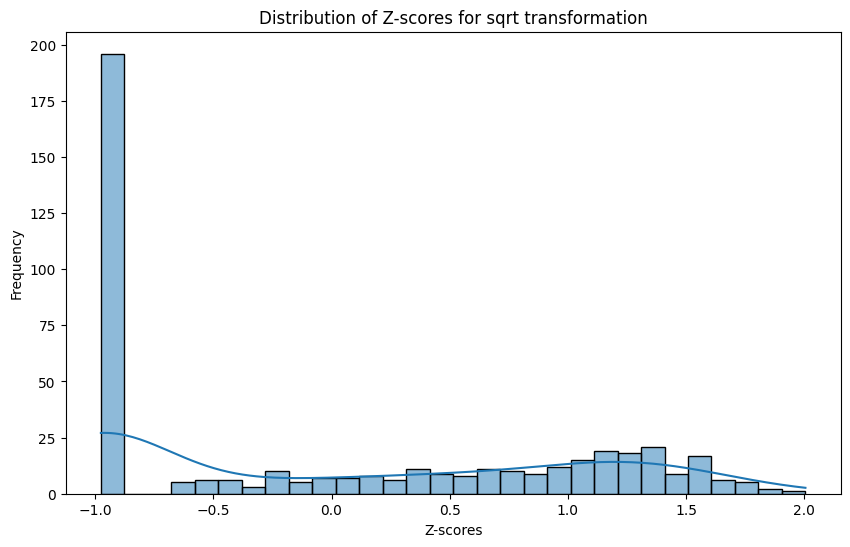

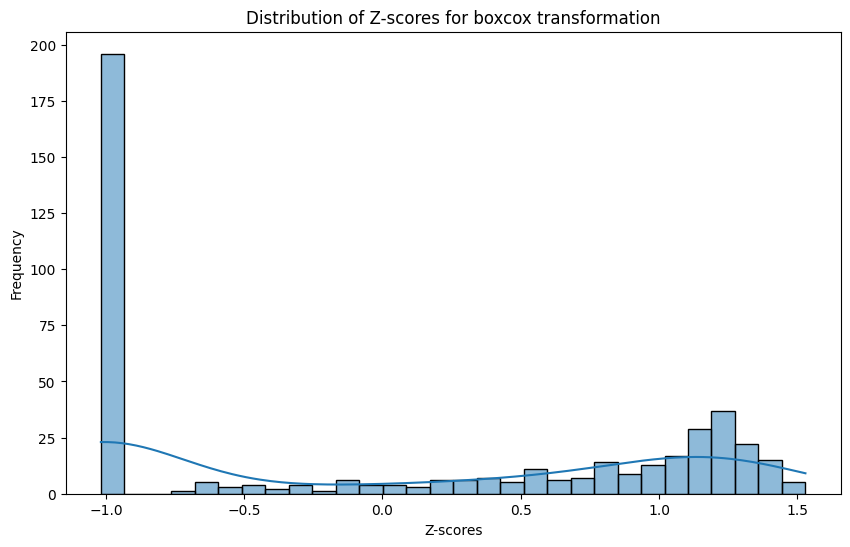

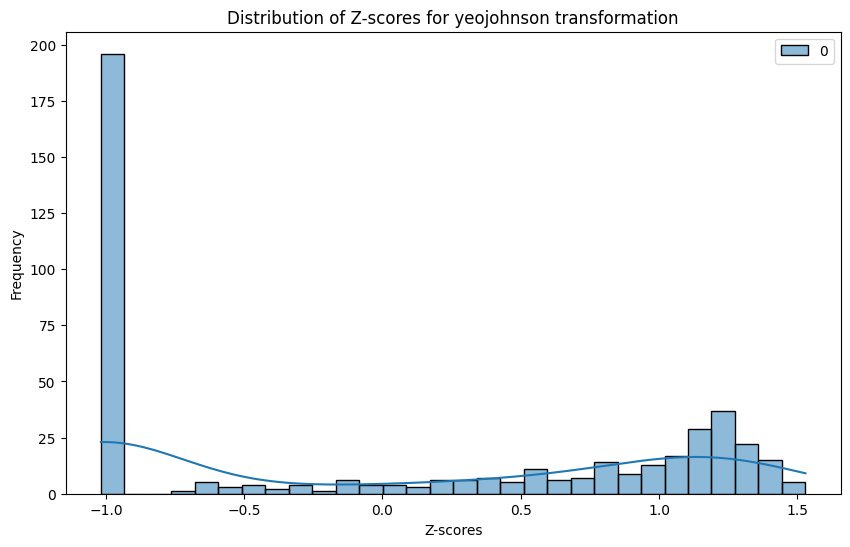

Transformation: original
Shapiro-Wilk Statistic: 0.7972
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: log
Shapiro-Wilk Statistic: 0.7935
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.8155
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: boxcox
Shapiro-Wilk Statistic: 0.7807
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.7807
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low



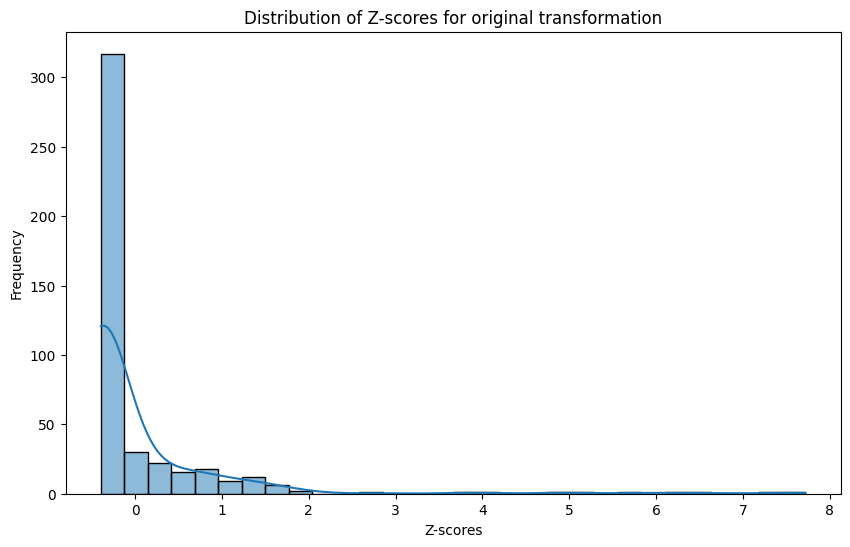

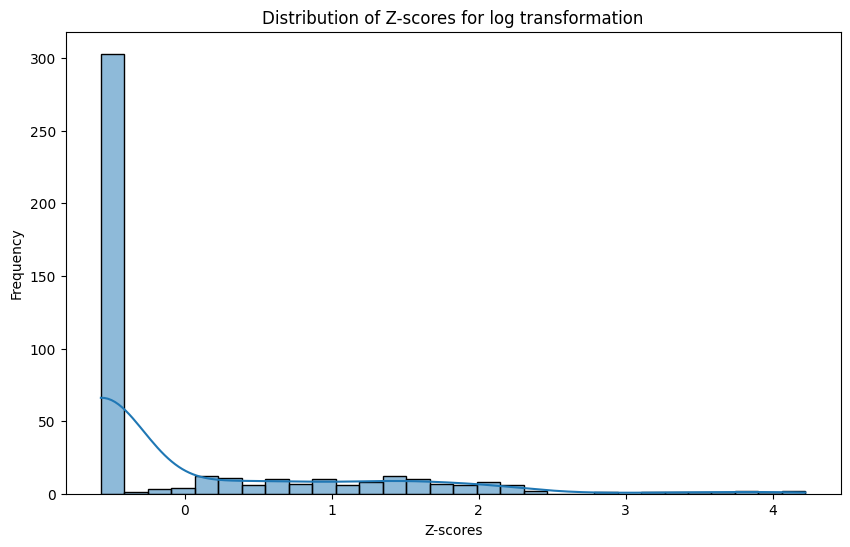

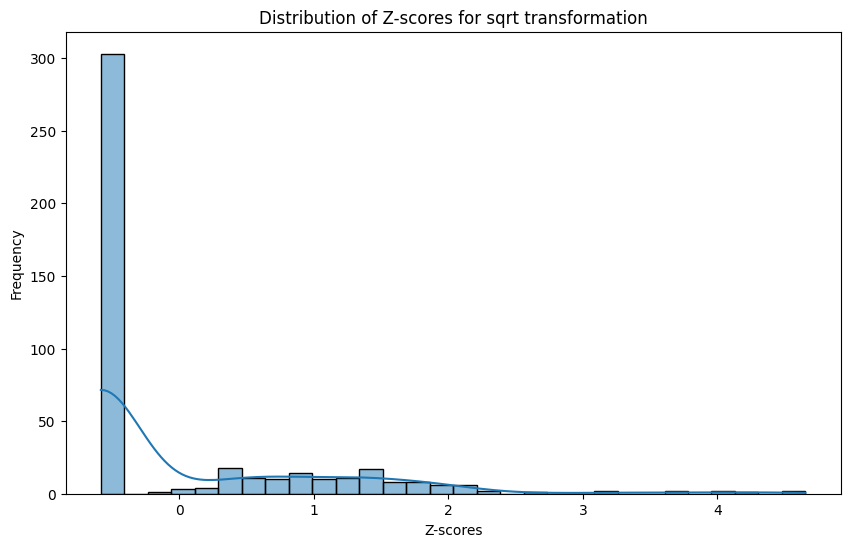

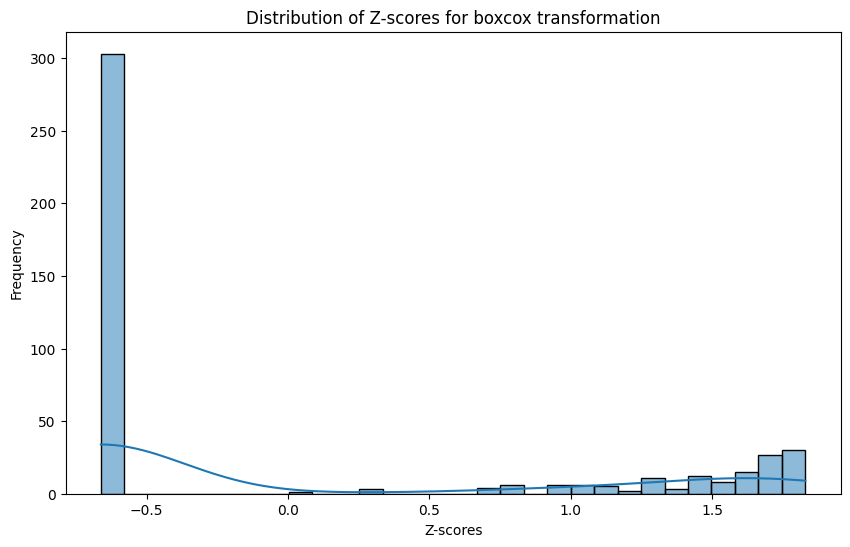

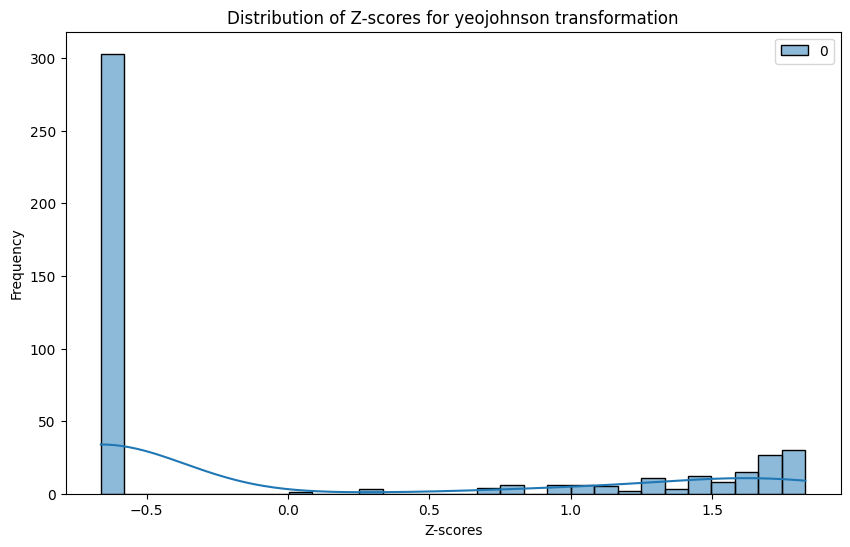

Transformation: original
Shapiro-Wilk Statistic: 0.4394
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: log
Shapiro-Wilk Statistic: 0.6381
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.6445
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: boxcox
Shapiro-Wilk Statistic: 0.6312
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.6312
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low



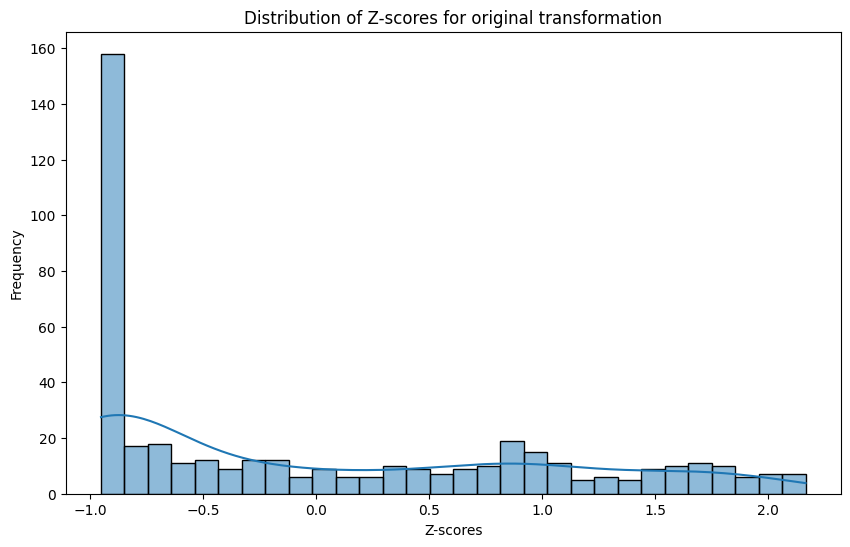

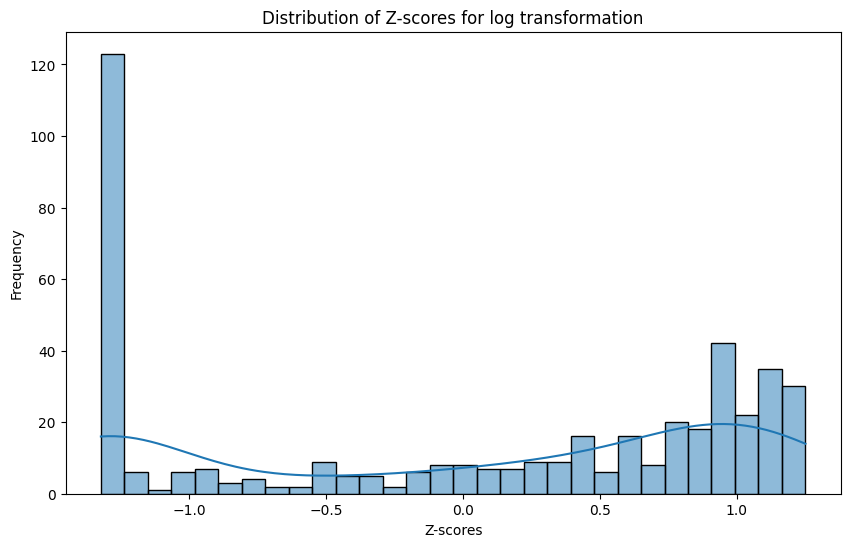

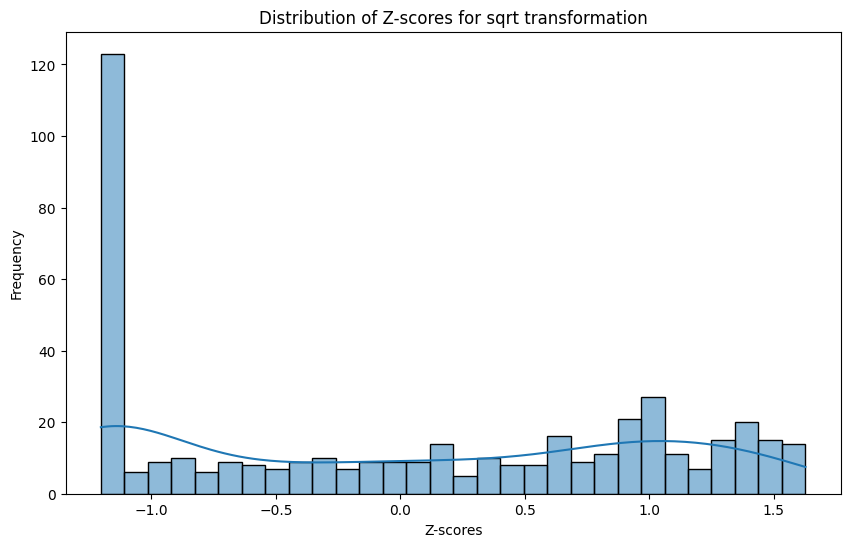

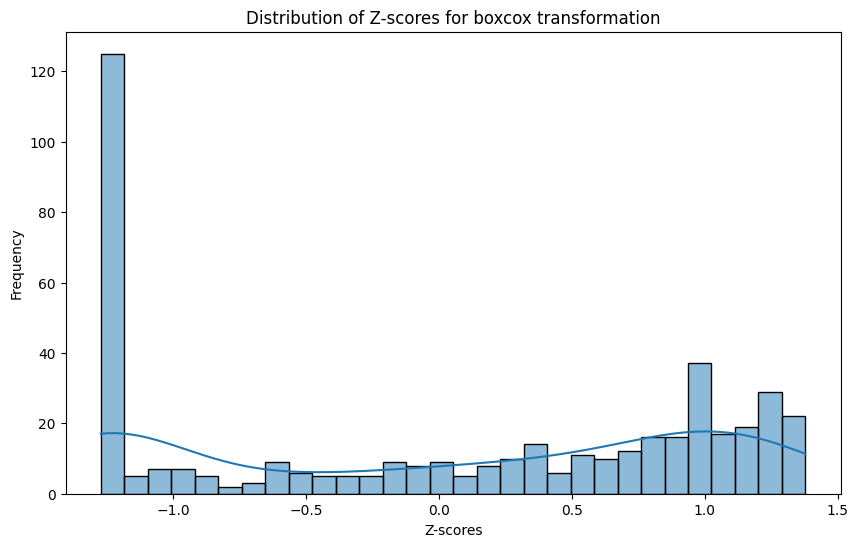

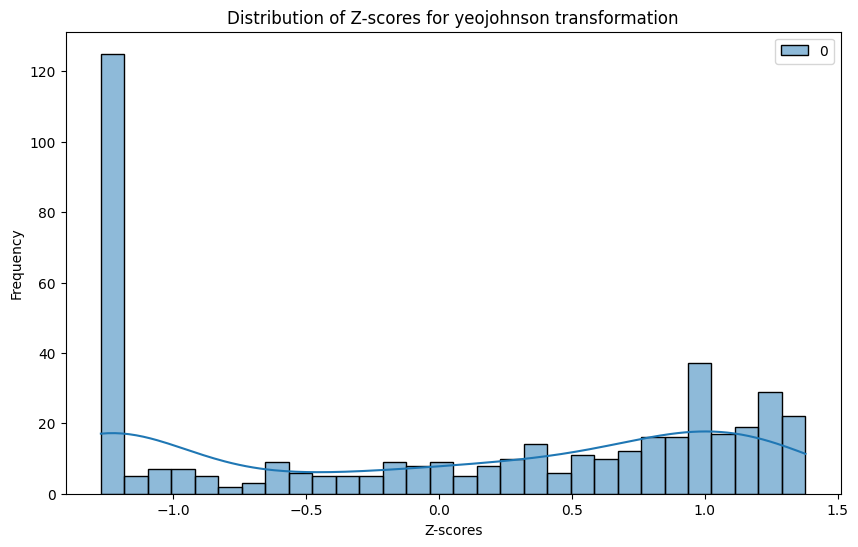

Transformation: original
Shapiro-Wilk Statistic: 0.8440
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: log
Shapiro-Wilk Statistic: 0.8281
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.8753
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: boxcox
Shapiro-Wilk Statistic: 0.8468
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.8468
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low



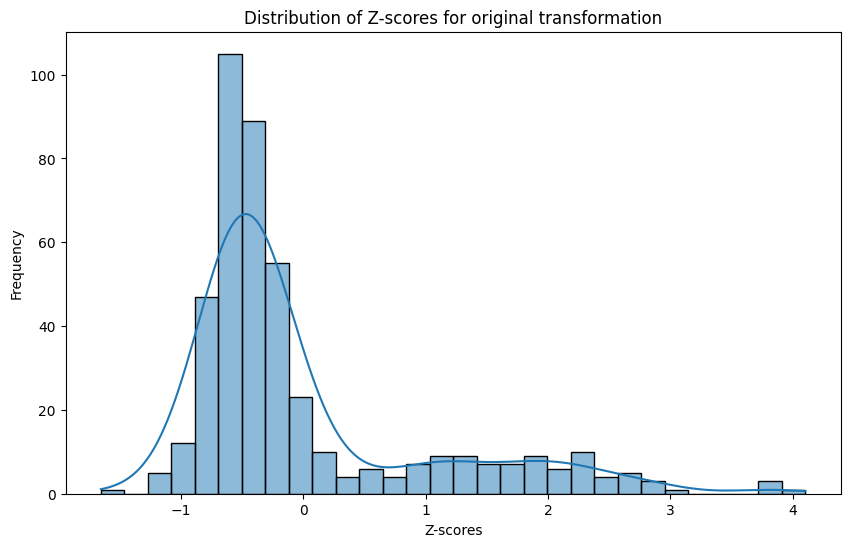

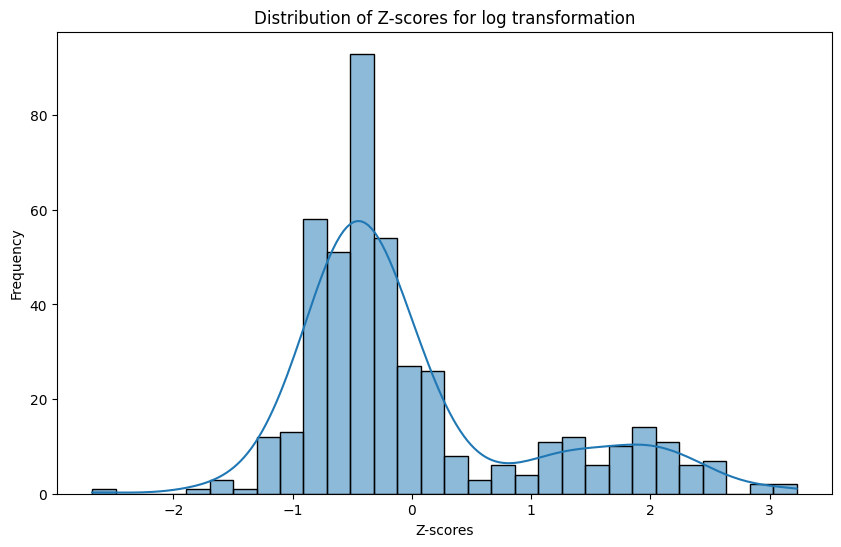

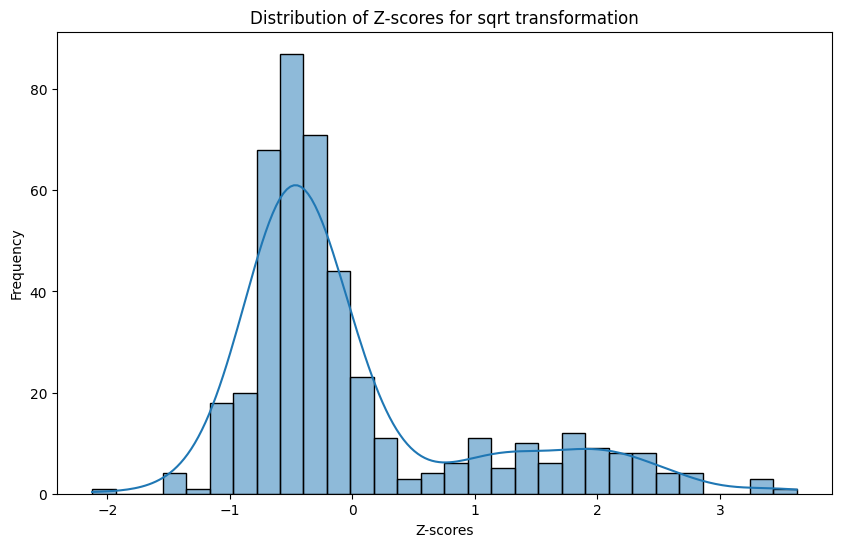

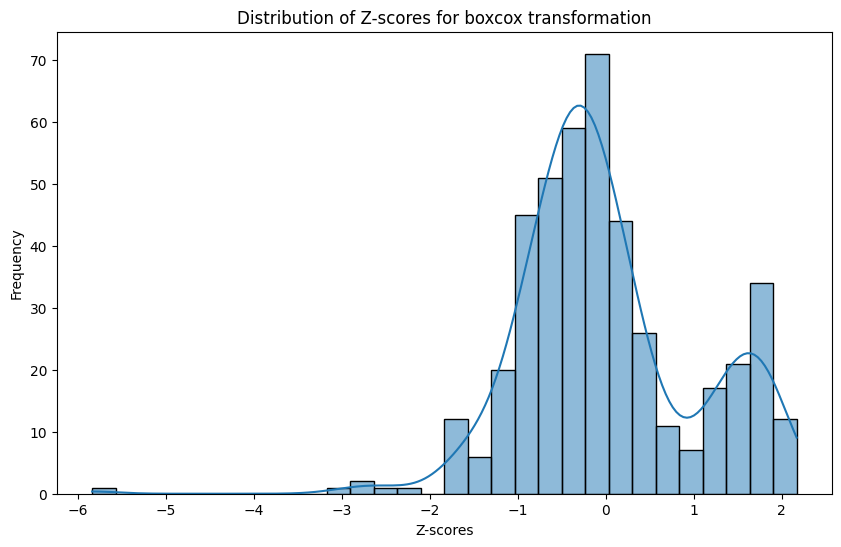

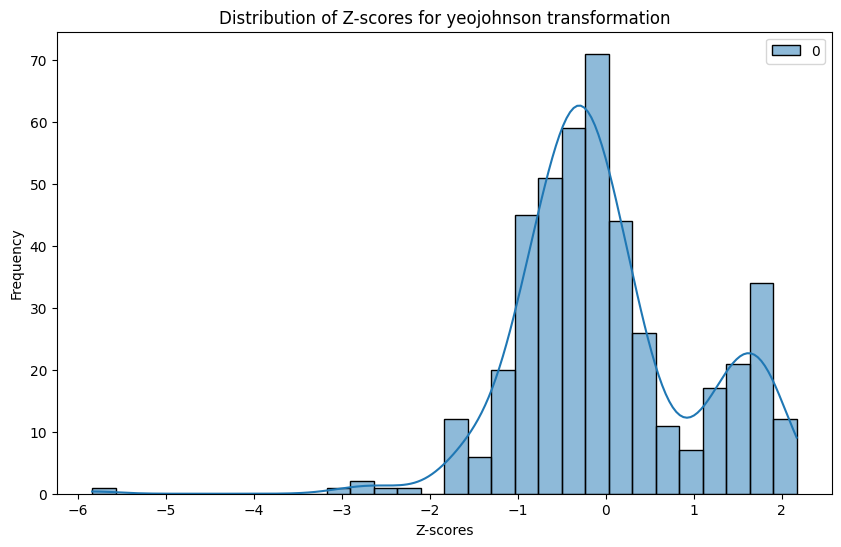

Transformation: original
Shapiro-Wilk Statistic: 0.7665
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: log
Shapiro-Wilk Statistic: 0.8551
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.8141
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: boxcox
Shapiro-Wilk Statistic: 0.9320
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.9320
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low



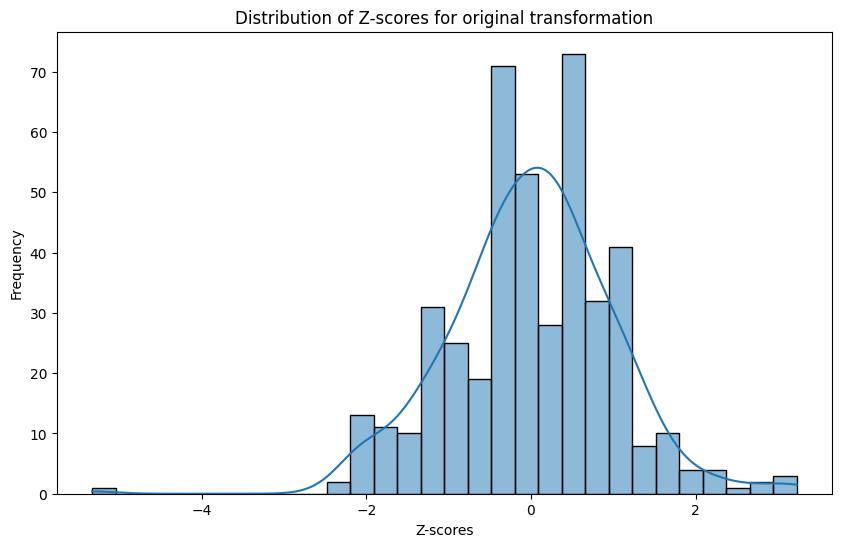

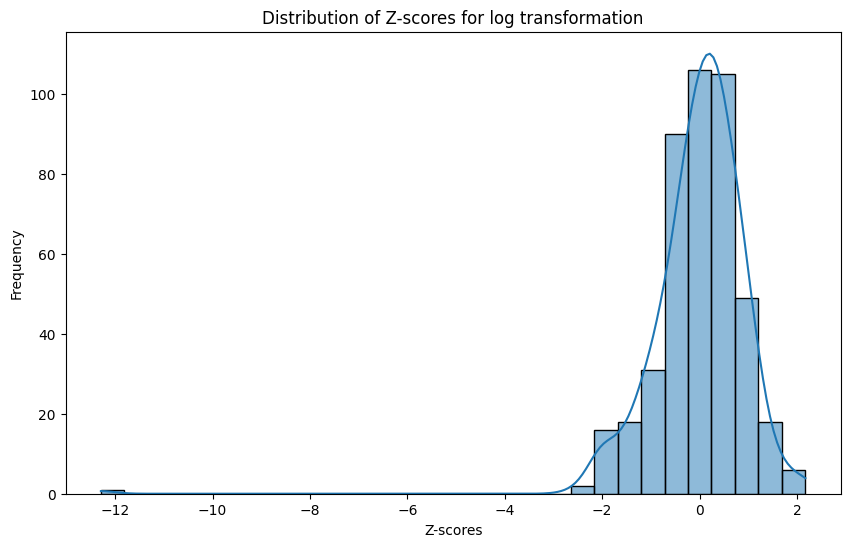

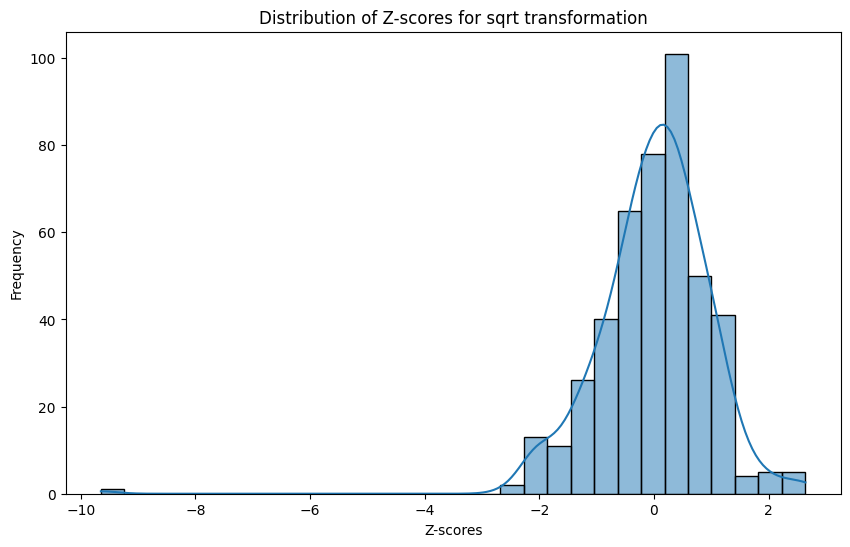

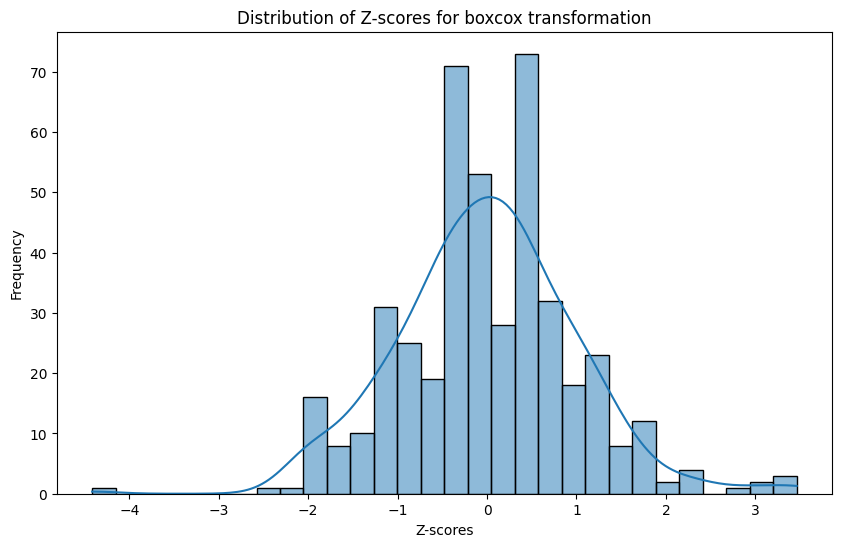

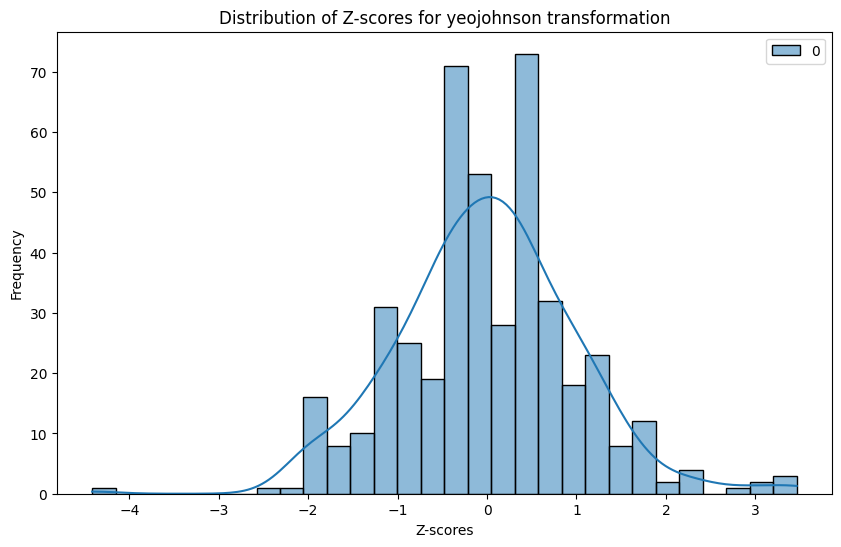

Transformation: original
Shapiro-Wilk Statistic: 0.9771
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: log
Shapiro-Wilk Statistic: 0.7742
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.8854
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: boxcox
Shapiro-Wilk Statistic: 0.9816
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.9816
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low



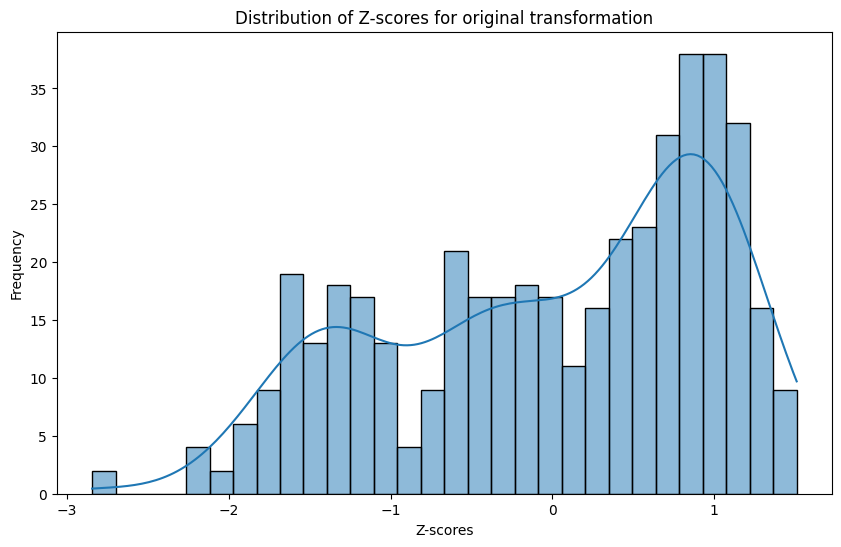

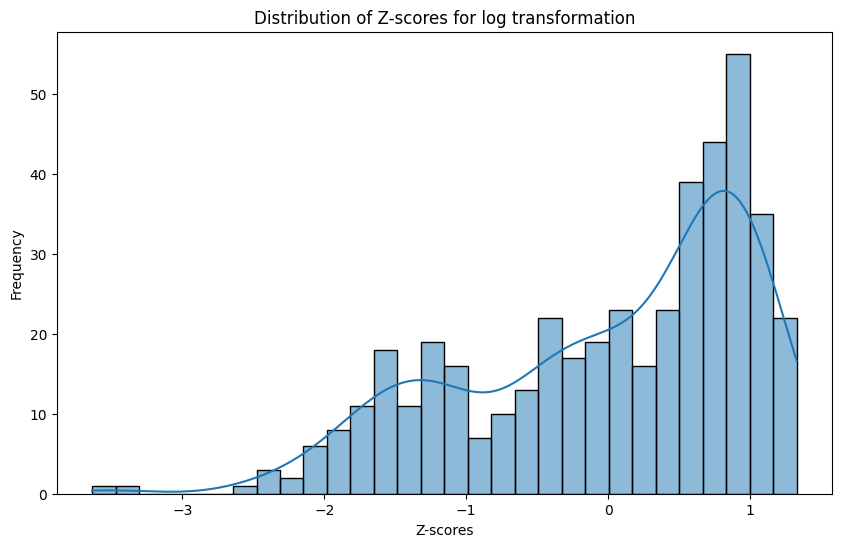

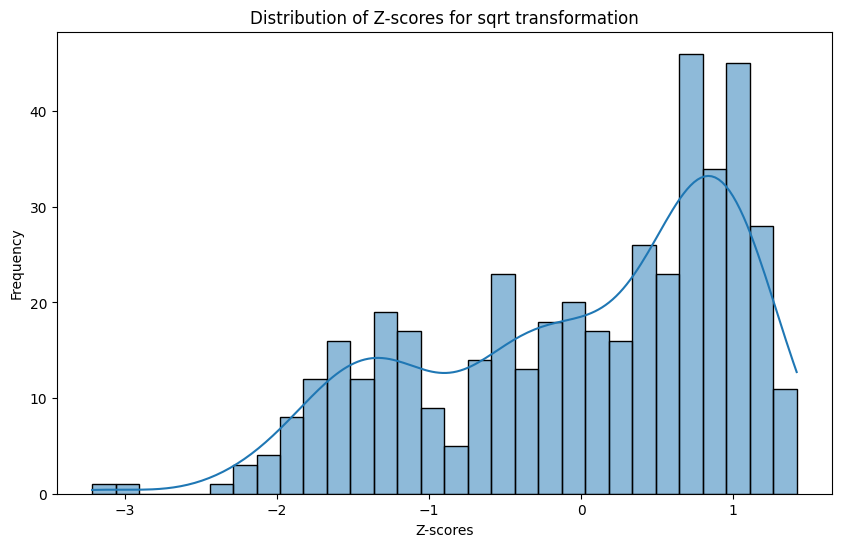

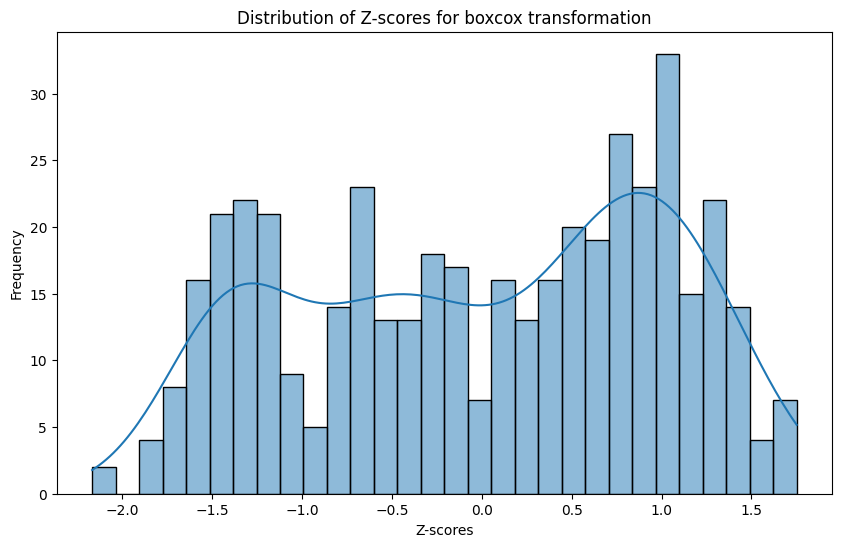

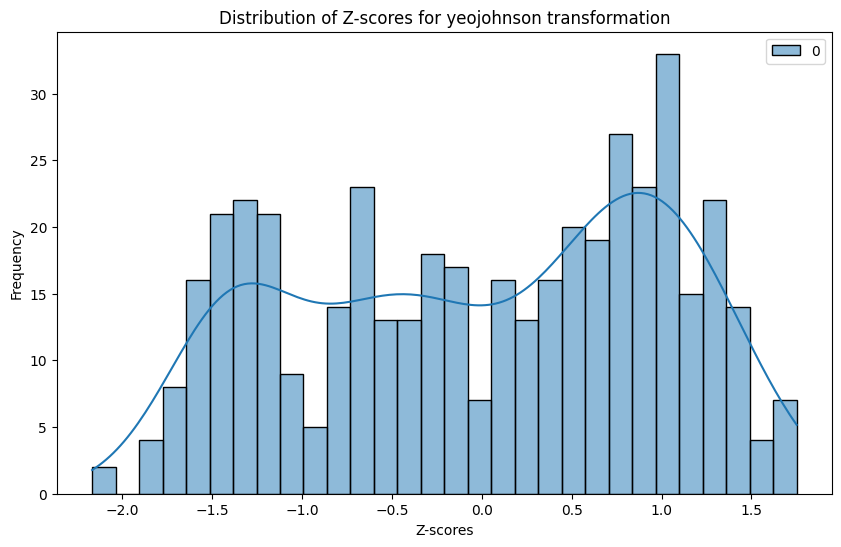

Transformation: original
Shapiro-Wilk Statistic: 0.9334
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: log
Shapiro-Wilk Statistic: 0.9114
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.9239
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: boxcox
Shapiro-Wilk Statistic: 0.9451
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.9451
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low



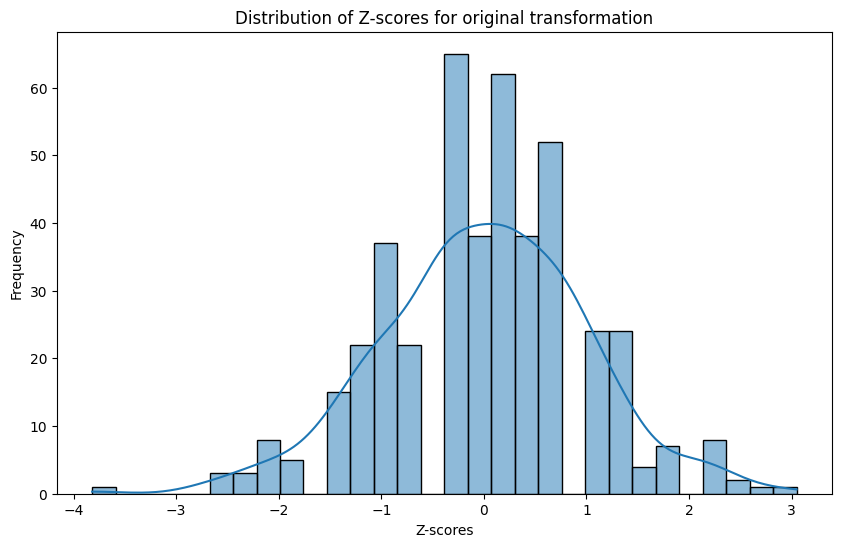

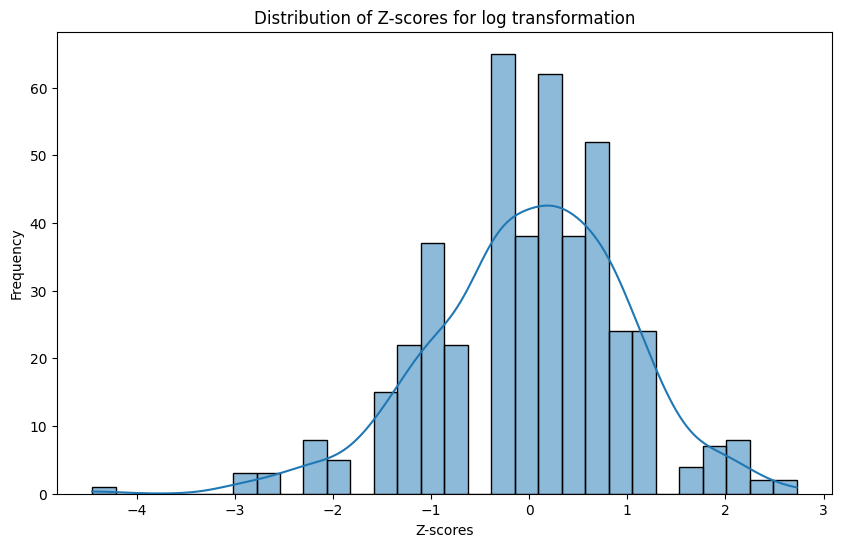

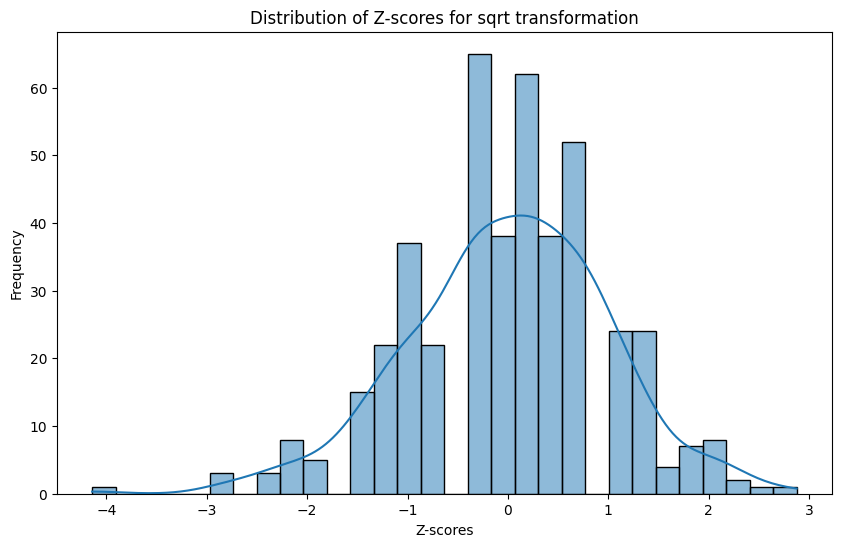

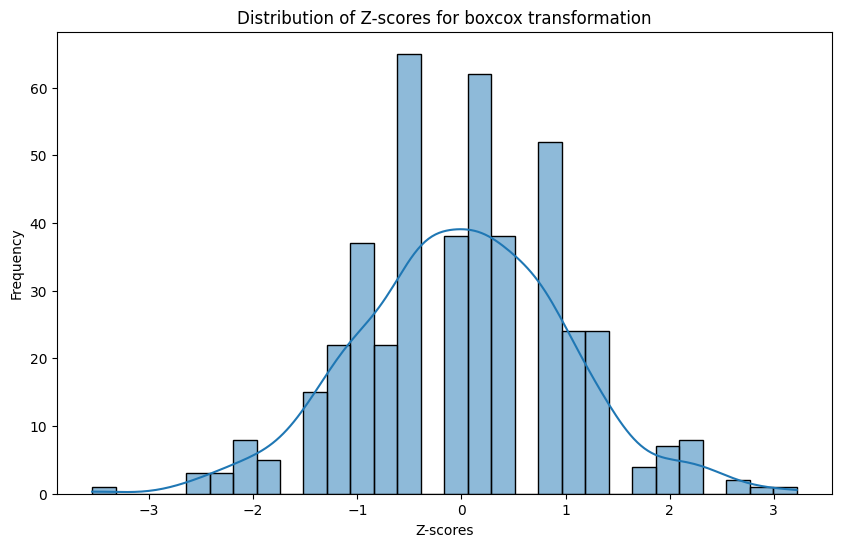

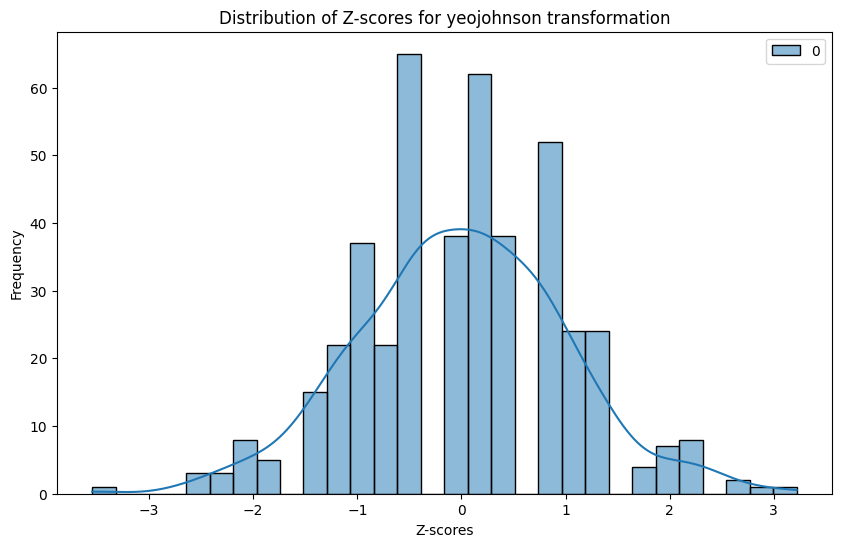

Transformation: original
Shapiro-Wilk Statistic: 0.9882
Shapiro-Wilk p-value: 0.0012
Likelihood of normal distribution: Low

Transformation: log
Shapiro-Wilk Statistic: 0.9799
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.9850
Shapiro-Wilk p-value: 0.0002
Likelihood of normal distribution: Low

Transformation: boxcox
Shapiro-Wilk Statistic: 0.9891
Shapiro-Wilk p-value: 0.0022
Likelihood of normal distribution: Low

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.9891
Shapiro-Wilk p-value: 0.0022
Likelihood of normal distribution: Low



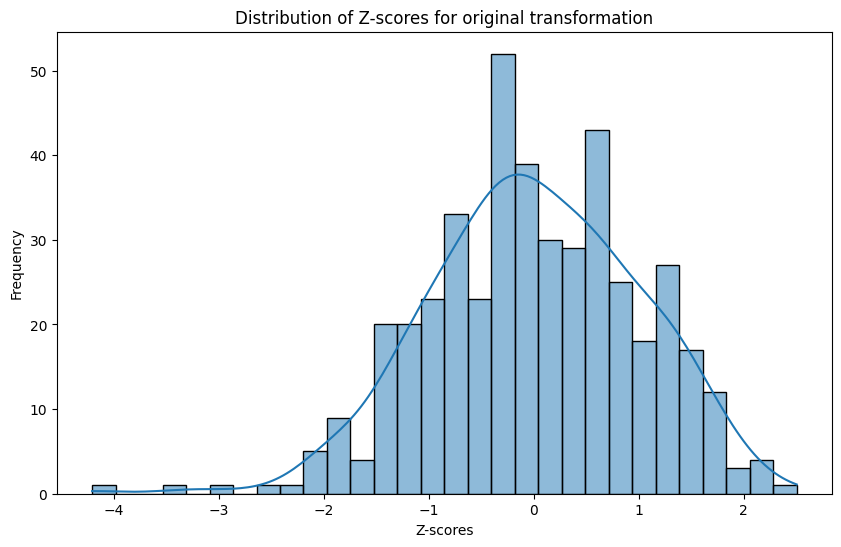

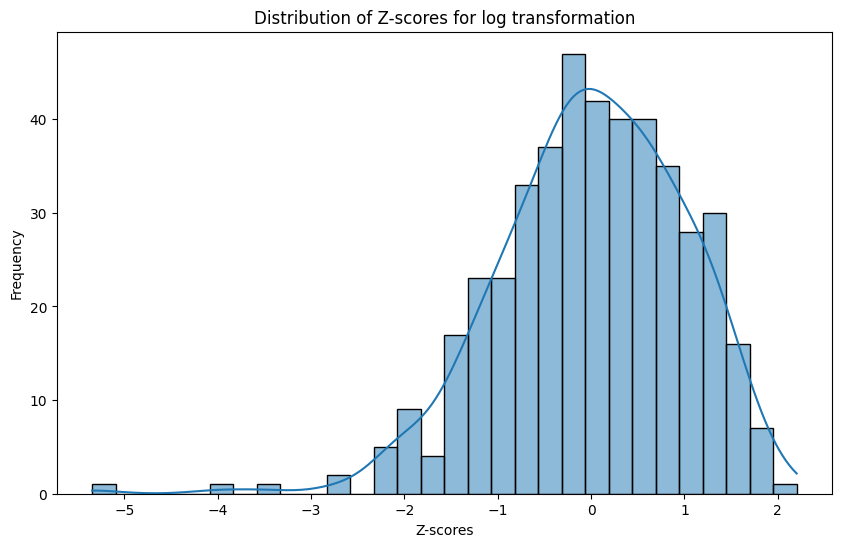

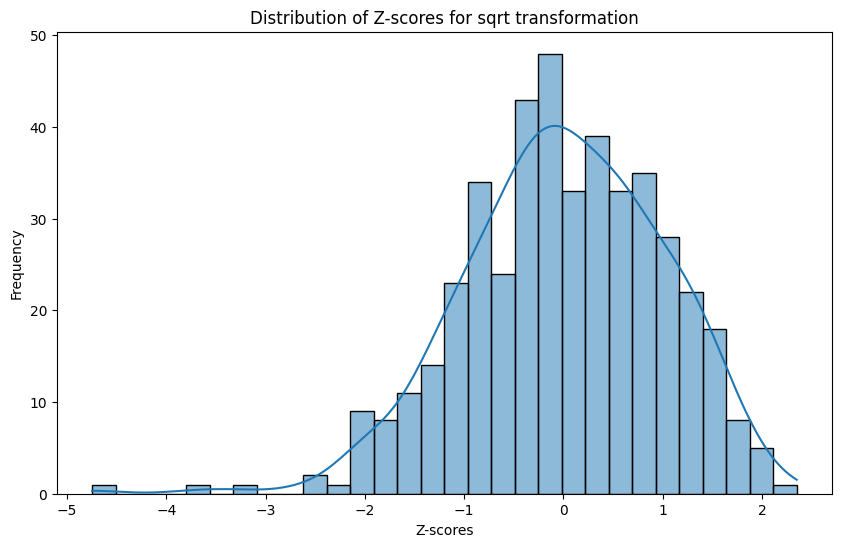

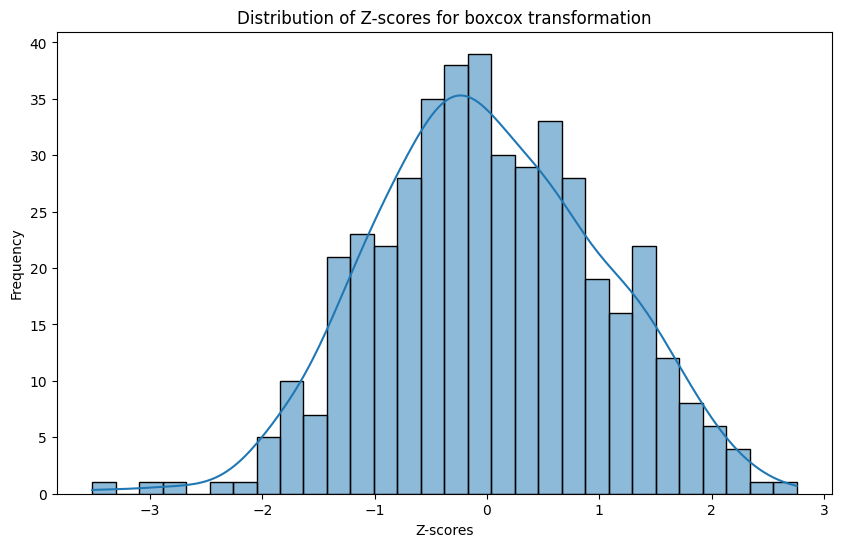

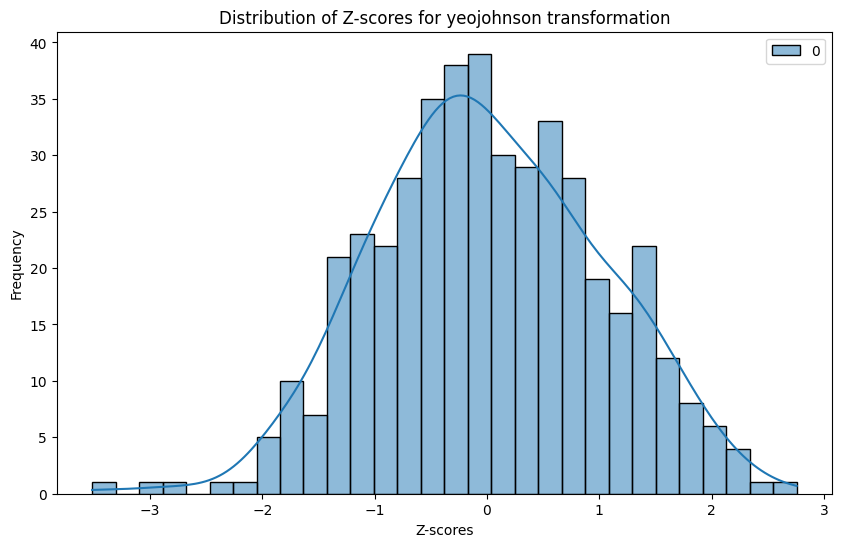

Transformation: original
Shapiro-Wilk Statistic: 0.9910
Shapiro-Wilk p-value: 0.0084
Likelihood of normal distribution: Low

Transformation: log
Shapiro-Wilk Statistic: 0.9707
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.9831
Shapiro-Wilk p-value: 0.0001
Likelihood of normal distribution: Low

Transformation: boxcox
Shapiro-Wilk Statistic: 0.9952
Shapiro-Wilk p-value: 0.1862
Likelihood of normal distribution: High

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.9952
Shapiro-Wilk p-value: 0.1862
Likelihood of normal distribution: High



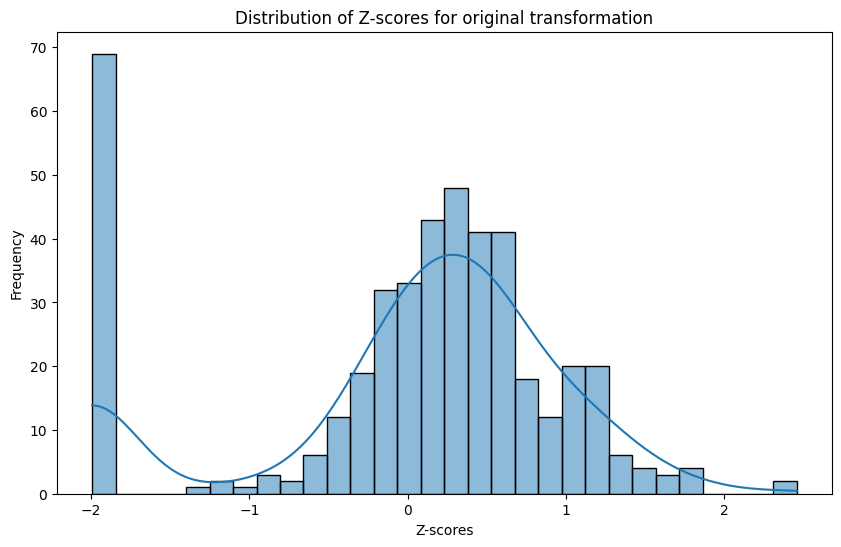

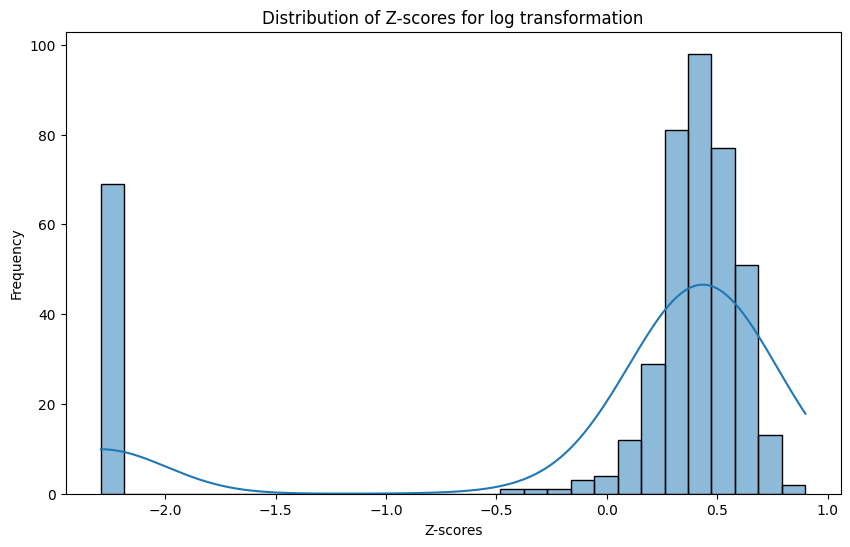

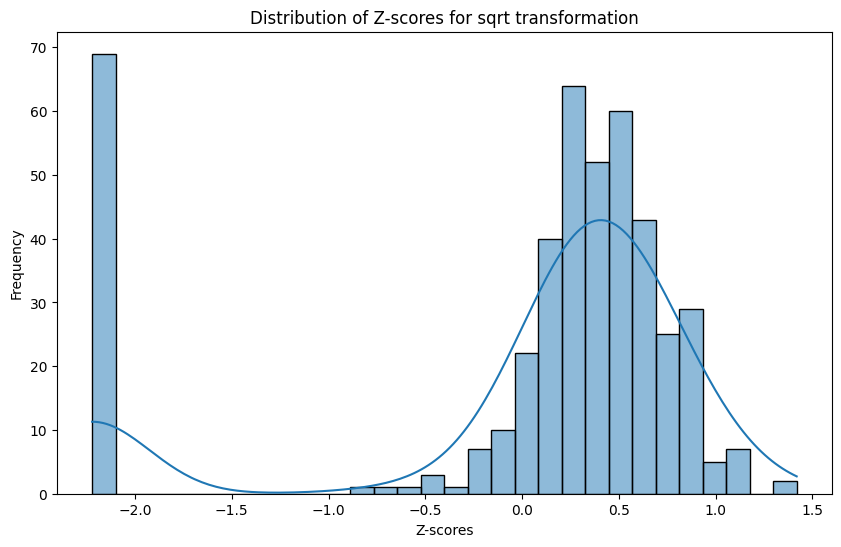

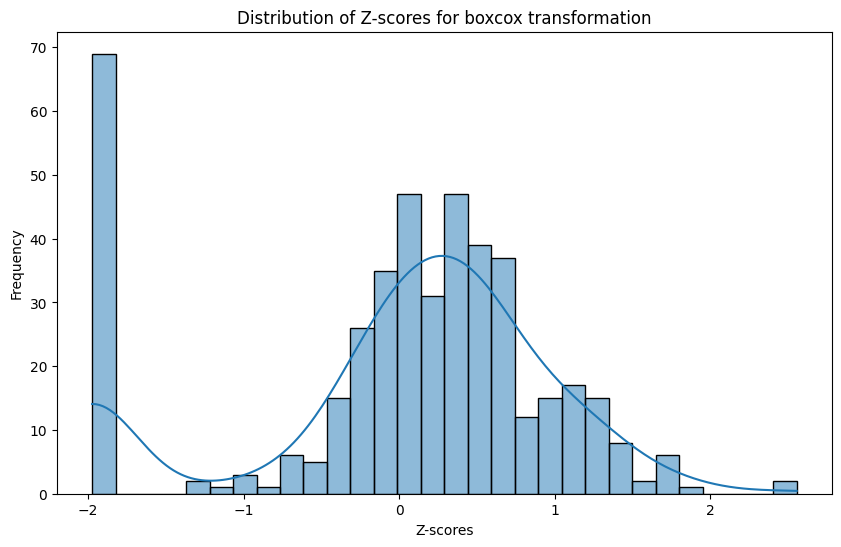

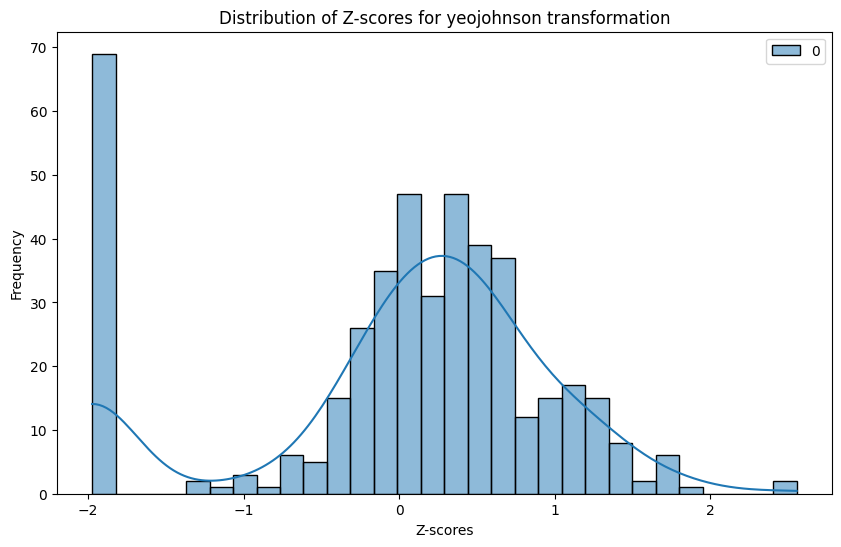

Transformation: original
Shapiro-Wilk Statistic: 0.8751
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: log
Shapiro-Wilk Statistic: 0.5817
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.7008
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: boxcox
Shapiro-Wilk Statistic: 0.8854
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.8854
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low



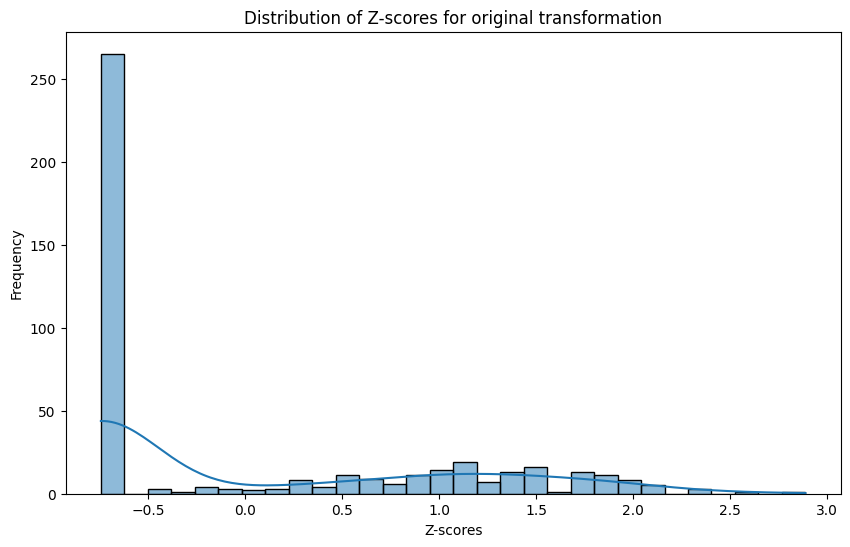

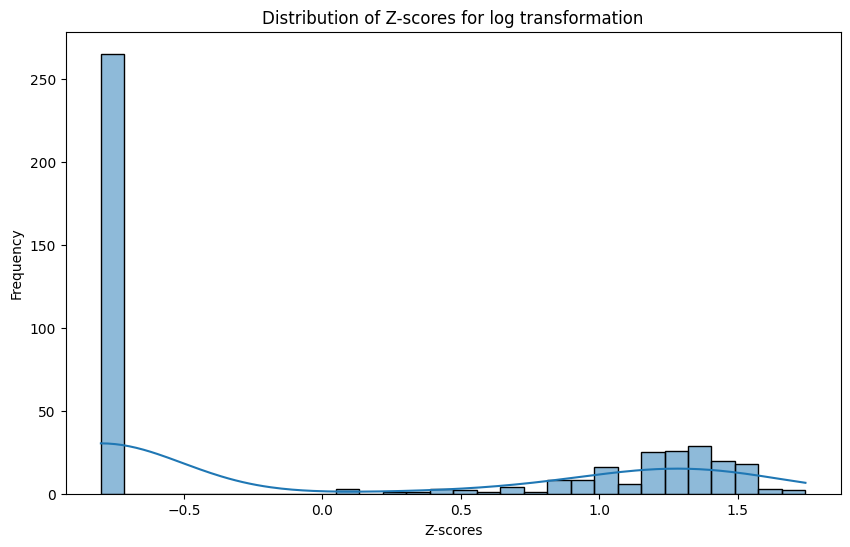

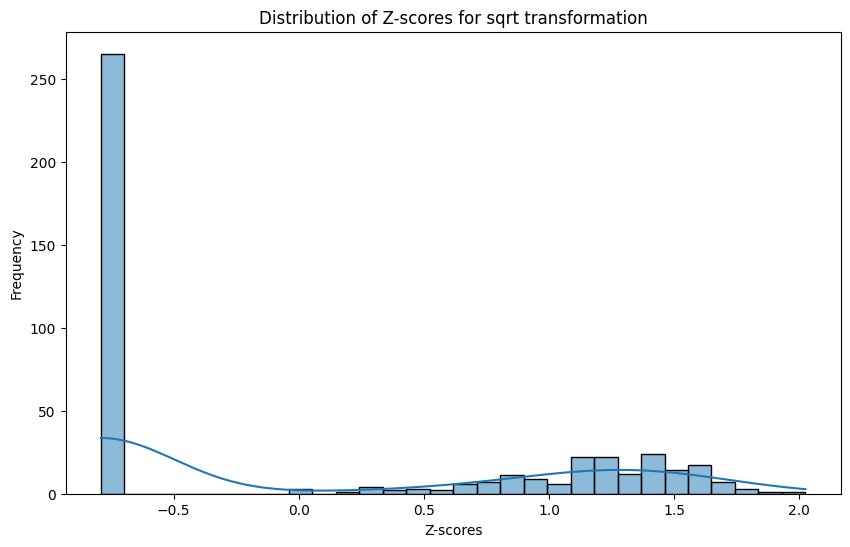

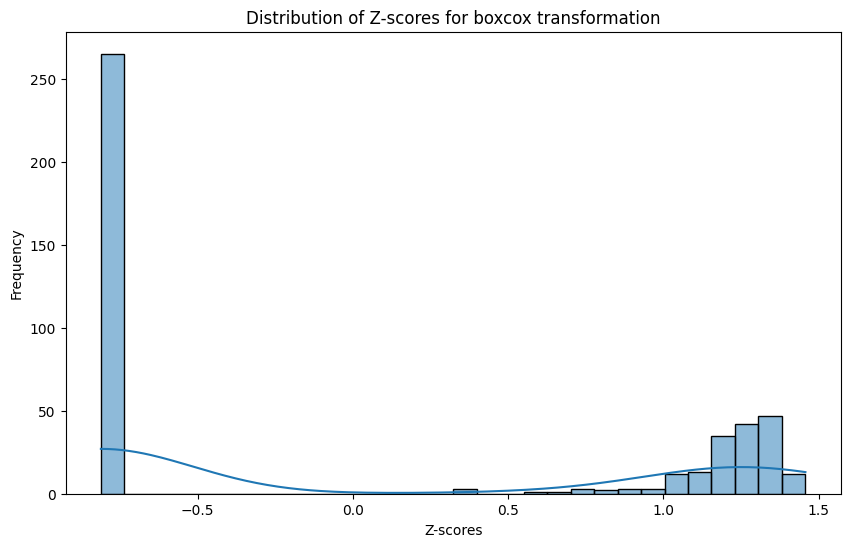

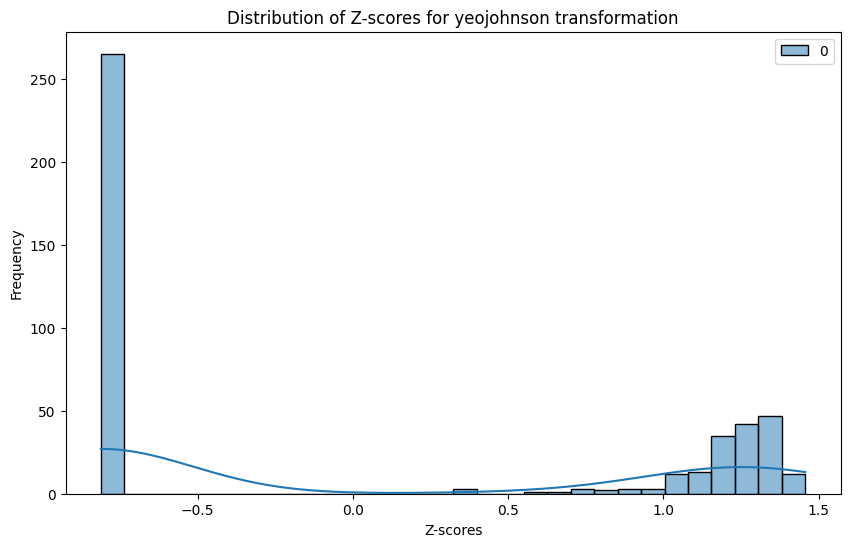

Transformation: original
Shapiro-Wilk Statistic: 0.7315
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: log
Shapiro-Wilk Statistic: 0.6897
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.7074
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: boxcox
Shapiro-Wilk Statistic: 0.6614
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.6614
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low



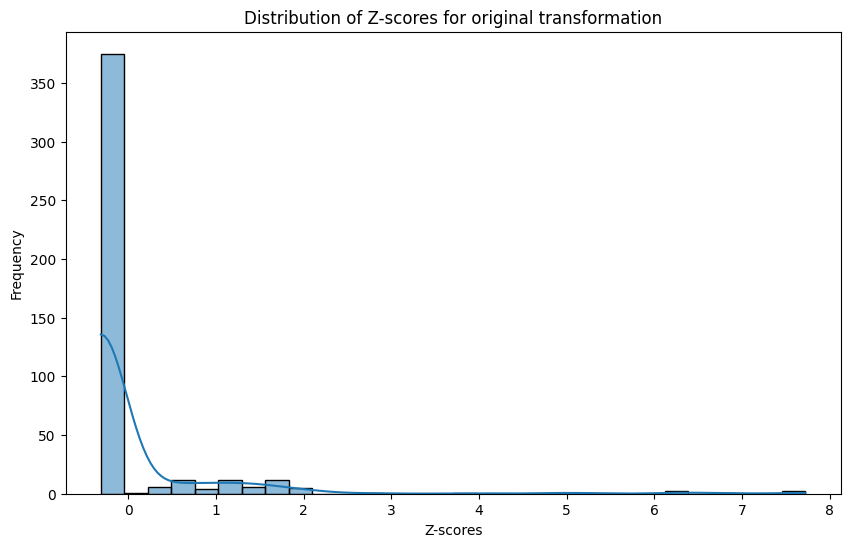

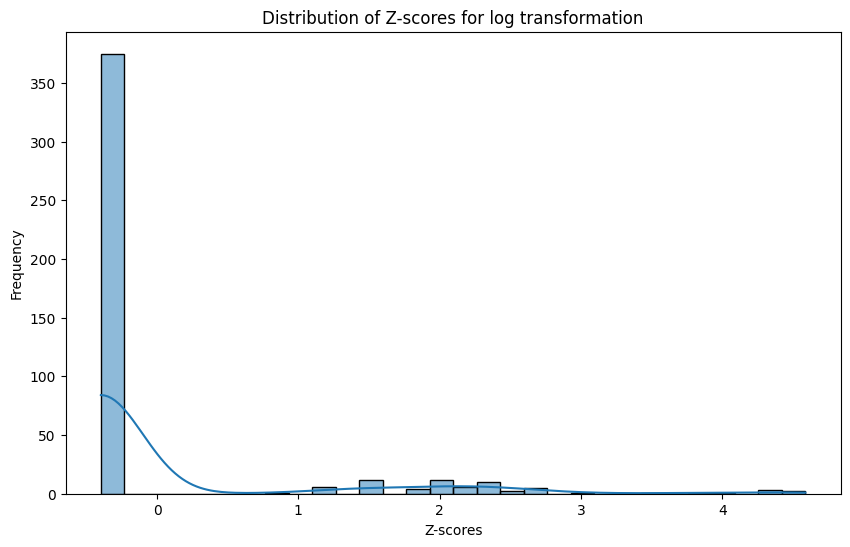

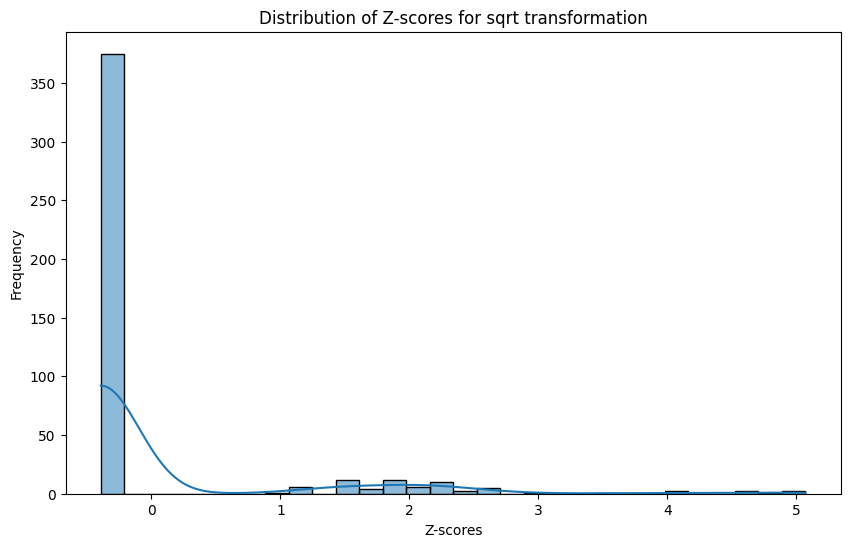

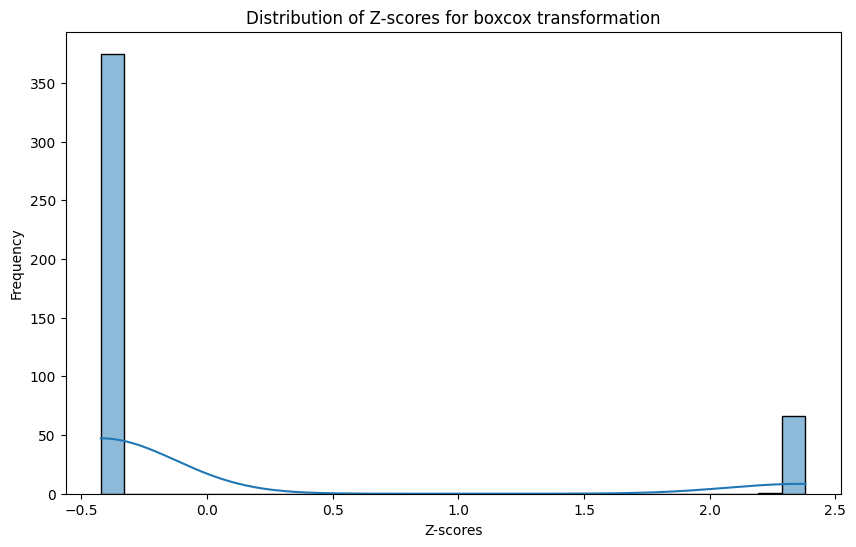

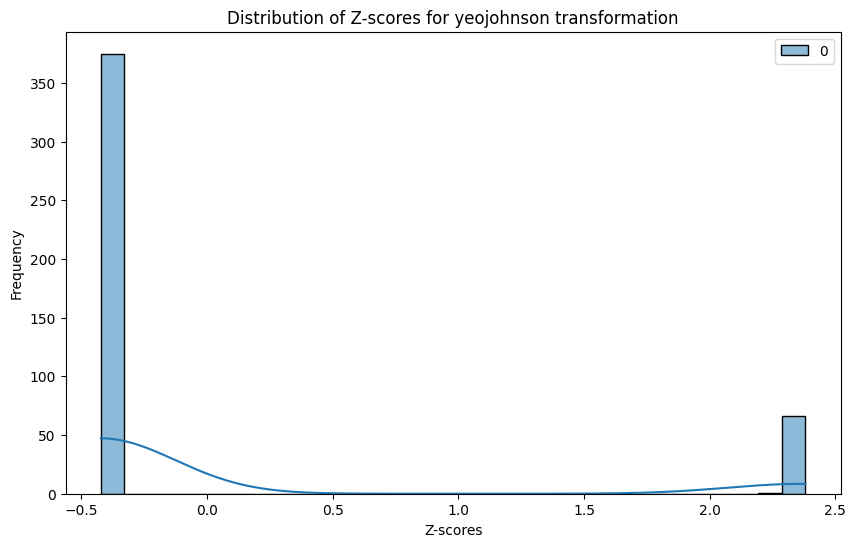

Transformation: original
Shapiro-Wilk Statistic: 0.3471
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: log
Shapiro-Wilk Statistic: 0.4522
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.4483
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: boxcox
Shapiro-Wilk Statistic: 0.4296
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.4296
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low



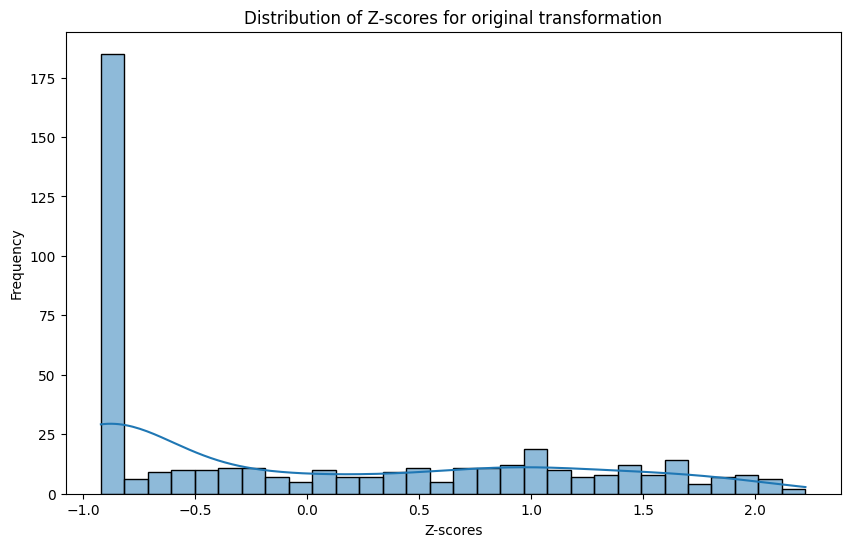

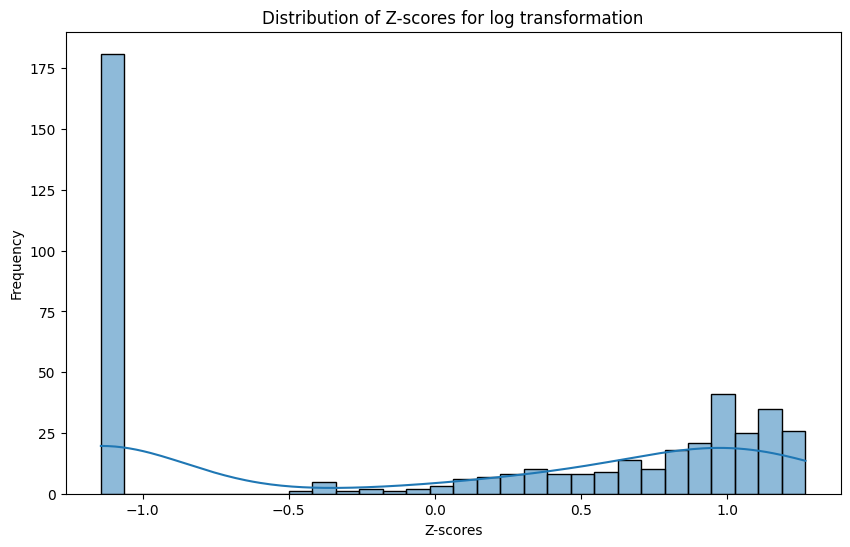

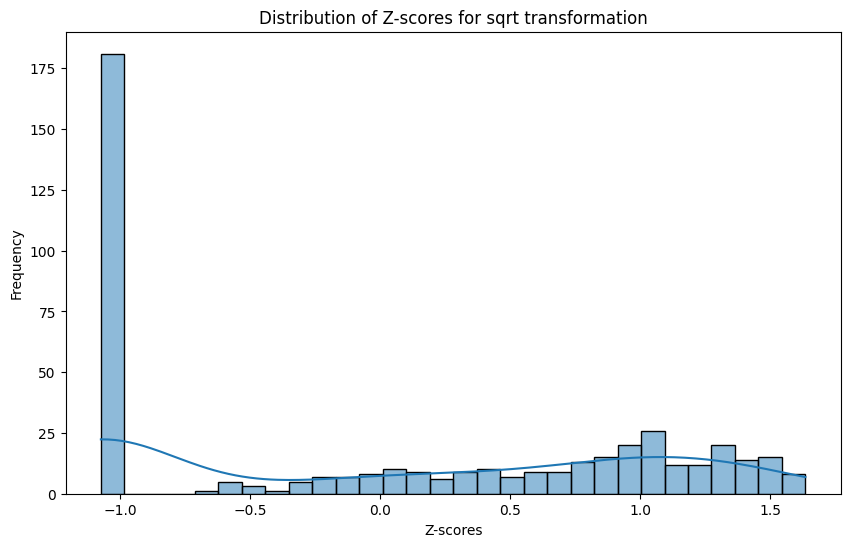

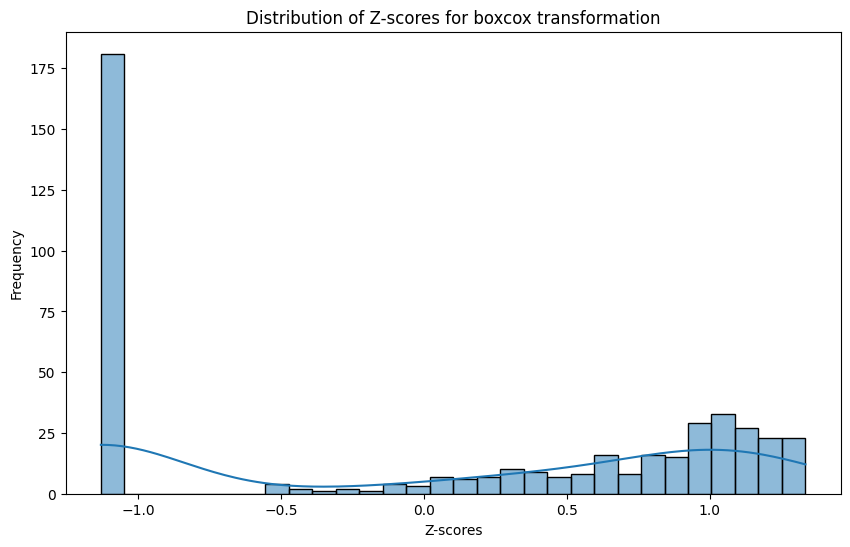

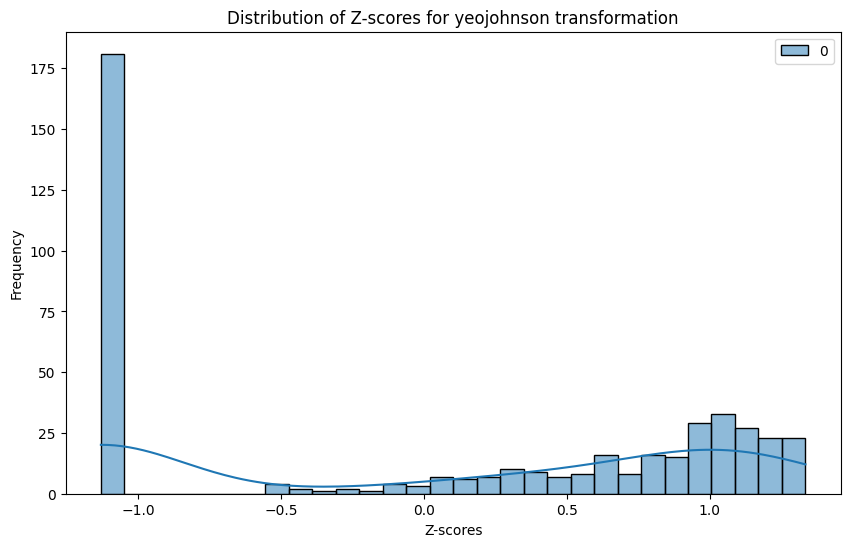

Transformation: original
Shapiro-Wilk Statistic: 0.8280
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: log
Shapiro-Wilk Statistic: 0.7705
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: sqrt
Shapiro-Wilk Statistic: 0.8233
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: boxcox
Shapiro-Wilk Statistic: 0.7831
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low

Transformation: yeojohnson
Shapiro-Wilk Statistic: 0.7831
Shapiro-Wilk p-value: 0.0000
Likelihood of normal distribution: Low



In [28]:
feature_cols = ["mean_ADHD", "mean_PTSD", "mean_anxiety", "mean_bipolar", "mean_depression",
                "mean_mental hospital", "mean_psychologist near me", "mean_psychiatrists near me", "mean_therapist near me",
                "median_ADHD", "median_PTSD", "median_anxiety", "median_bipolar", "median_depression",
                "median_mental hospital", "median_psychologist near me", "median_psychiatrists near me", "median_therapist near me"
                ]

pt = PowerTransformer(method='yeo-johnson')
normal_distributed_cols = []
for col in feature_cols:
    print_normal_distribution_likelihood(evaluate_transformations(df, col)) 
    # nd = check_normal_distribution(df, col)
    # if not nd:
    #     df[f'{col}_column_sqrt'] = np.sqrt(df[col])
    #     if check_normal_distribution(df, f'{col}_column_sqrt'):
    #         normal_distributed_cols.append(f'{col}_column_sqrt')
    #     df[f'{col}_column_yeojohnson'] = pt.fit_transform(df[[col]])
    #     if check_normal_distribution(df,f'{col}_column_yeojohnson'):
    #         normal_distributed_cols.append(f'{col}_column_yeojohnson')
    # else:
    #     normal_distributed_cols.append(col)

# print(normal_distributed_cols)
# for col in normal_distributed_cols:
#         plot_distribution(df, col)



In [ ]:
cols = [
    "mean_ADHD_val_change", "mean_ADHD_perc_change", "mean_PTSD_val_change", "mean_PTSD_perc_change",
    "mean_anxiety_val_change", "mean_anxiety_perc_change", "mean_bipolar_val_change", "mean_bipolar_perc_change",
    "mean_depression_val_change", "mean_depression_perc_change", "mean_mental hospital_val_change",
    "mean_mental hospital_perc_change", "mean_psychologist near me_val_change", "mean_psychologist near me_perc_change",
    "mean_psychiatrists near me_val_change", "mean_psychiatrists near me_perc_change", "mean_therapist near me_val_change",
    "mean_therapist near me_perc_change", "median_ADHD_val_change", "median_ADHD_perc_change", "median_PTSD_val_change",
    "median_PTSD_perc_change", "median_anxiety_val_change", "median_anxiety_perc_change", "median_bipolar_val_change",
    "median_bipolar_perc_change", "median_depression_val_change", "median_depression_perc_change",
    "median_mental hospital_val_change", "median_mental hospital_perc_change", "median_psychologist near me_val_change",
    "median_psychologist near me_perc_change", "median_psychiatrists near me_val_change", "median_psychiatrists near me_perc_change",
    "median_therapist near me_val_change", "median_therapist near me_perc_change", "UTIL_RATE_val_change", "UTIL_RATE_perc_change"
]

for col in cols:
    plot_distribution(df, col)
    check_normal_distribution(df, col)
